# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [32]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [33]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  \
0  13 186-9-120-A--Spectrum--033--Spec.Data 1_CRR...           1.0   
1  17 186-9-122-B--Spectrum--057--Spec.Data 1_CRR...           1.0   
2  24 187-8-101-B--Spectrum--083--Spec.Data 1_CRR...           1.0   
3  26 187-8-102-B--Spectrum--094--Spec.Data 1_CRR...           1.0   
4     27 187-8-102-C--Spectrum--096--Spec.Data 1.txt           0.0   
5     28 187-8-102-D--Spectrum--098--Spec.Data 1.txt           0.0   
6     29 187-8-102-E--Spectrum--100--Spec.Data 1.txt           0.0   
7  32 187-8-103-A--Spectrum--111--Spec.Data 1_CRR...           1.0   
8  35 187-8-103-MIC-bigbub--Spectrum--117--Spec.D...           1.0   

   approx_split    Diad1_pos    Diad2_pos      HB1_pos      HB2_pos  C13_pos  \
0    103.373715  1285.725713  1389.099428          NaN  1410.513262      NaN   
1    103.412210  1285.687219  1389.099428          NaN  1410.441773      NaN   
2    103.511195  1285.483749  1388.994944  1265.433713  1410.392280      NaN   
3    104.182096  1283.877986  1388.060082          NaN  1409.094472      NaN   
4    104.457055  1283.443550  1387.900605          NaN  1409.231951      NaN   
5    104.275582  1283.811996  1388.087578          NaN  1409.974342      NaN   
6    104.413062  1283.504042  1387.917103          NaN  1409.600397      NaN   
7    103.247234  1286.033667  1389.280901  1265.752666  1410.683737      NaN   
8    103.252733  1285.923684  1389.176417  1265.538198  1410.579252      NaN   

   Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0      382.929754      680.385844  ...  763.846102         NaN   1094.679754   
1      287.487892      526.407440  ...  735.445969         NaN    987.862892   
2      579.690577     1105.861374  ...  841.372930         NaN   1341.565577   
3      472.869212      978.722787  ...  750.685333         NaN   1176.494212   
4      456.949600      959.684835  ...  719.621298         NaN   1135.949600   
5      329.412401      691.715776  ...  703.443693         NaN    997.662401   
6      499.787584     1033.362537  ...  719.814989         NaN   1169.162584   
7      478.238888      811.311462  ...  733.590102         NaN   1149.988888   
8      375.283384      696.698062  ...  739.867657         NaN   1062.533384   

   HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0         NaN           711.750          714.5000                     NaN   
1         NaN           700.375          701.7500                     NaN   
2  811.627383           761.875          764.6875                     NaN   
3         NaN           703.625          703.8125                     NaN   
4         NaN           679.000          678.1250                     NaN   
5         NaN           668.250          667.2500                     NaN   
6         NaN           669.375          668.5000                     NaN   
7  707.022570           671.750          669.6250                     NaN   
8  723.295427           687.250          686.5000                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               0.996332                        NaN                  21.599518  
1               0.995198                        NaN                  16.171696  
2               0.996411                  18.881551                  27.703097  
3               1.005317                        NaN                  20.913750  
4               1.006250                        NaN                  22.085570  
5               1.002058                        NaN                  30.165143  
6               1.013128                        NaN                  28.567764  
7               0.998320                  20.910389                  39.310141  
8               0.998363                  16.200049                  24.266382  

[9 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [34]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

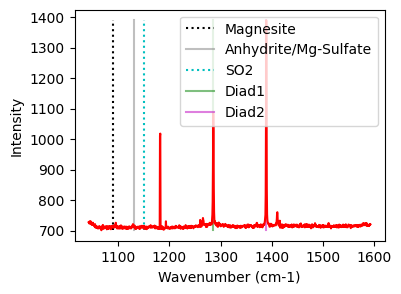

In [35]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [36]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [37]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=382.9297540570303, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.745262       1285.745262        0.042671        773.238422   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.691185                  0             392.950543   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        4.951513         0.78243    1.382369  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0       1.07335      1.010274                   0.101396   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.003518  PseudoVoigtModel

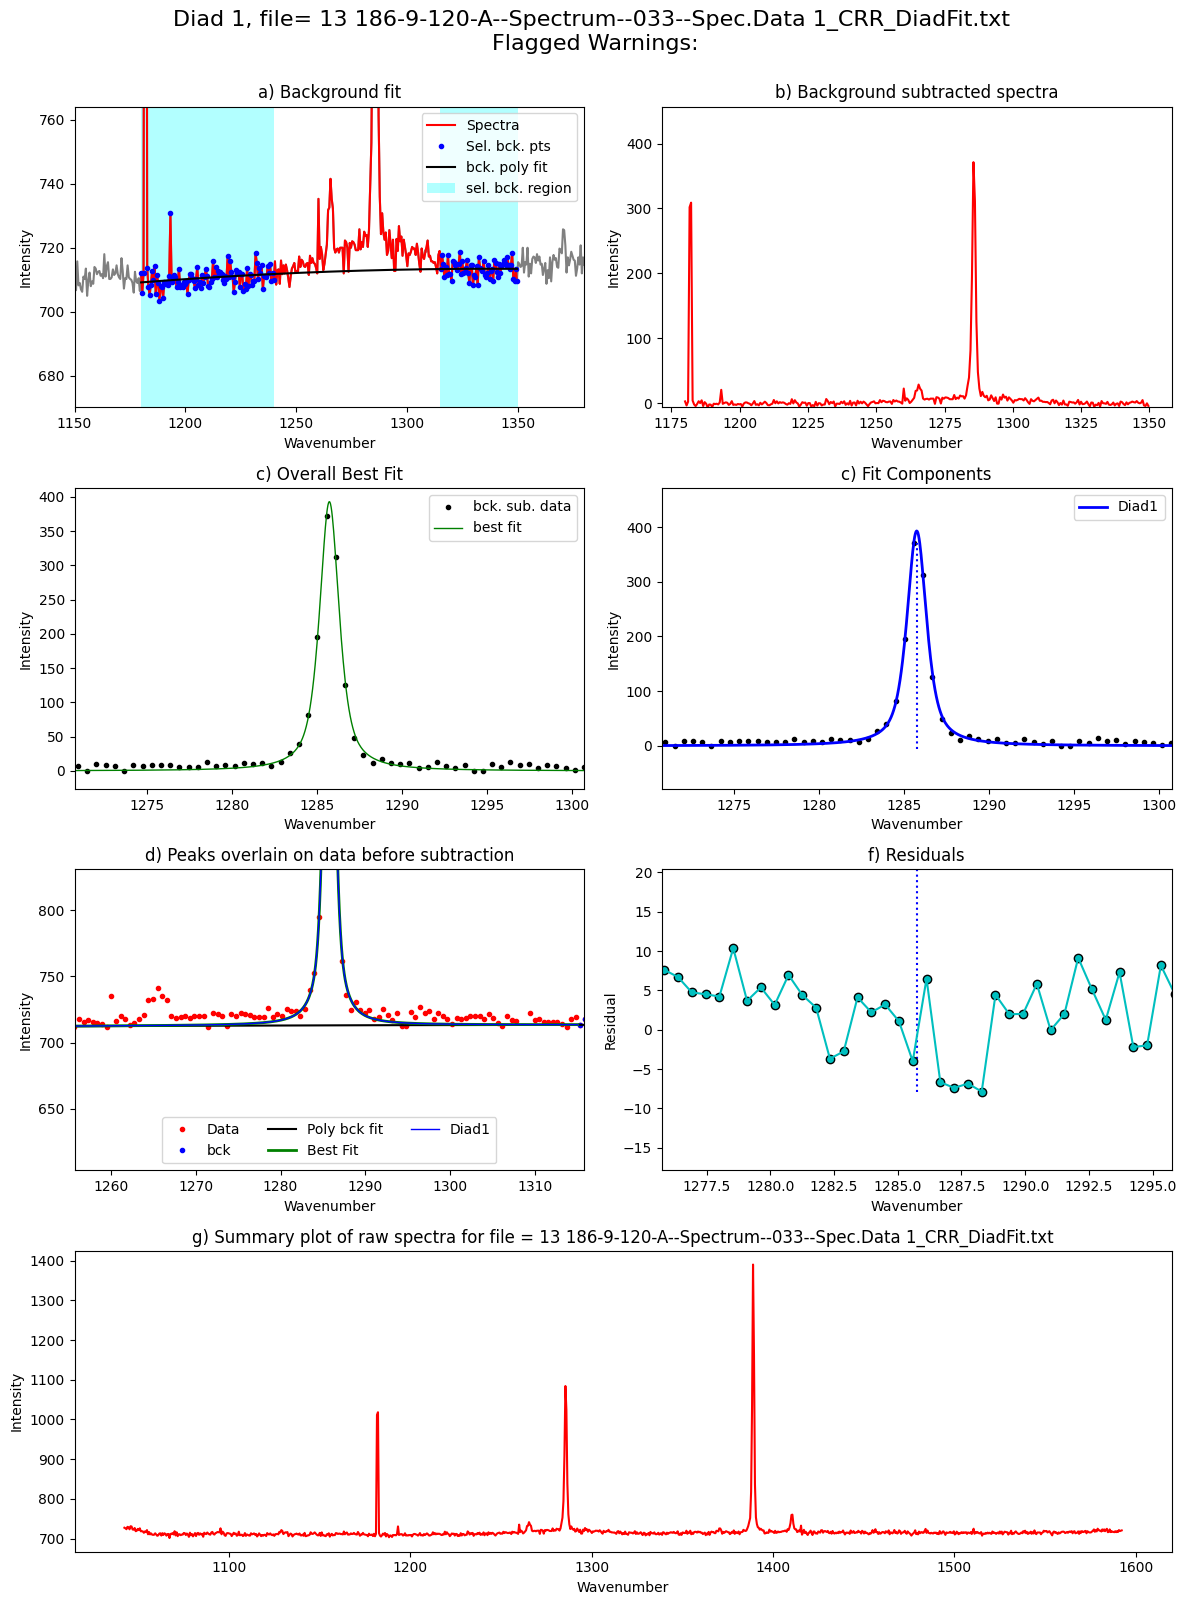

In [38]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [39]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [40]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=96.6922043652271, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=680.3858442005951, HB_prom=48.34610218261355, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1389.124059       1389.124009        0.003038        1053.01066   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.581297                  0  1410.483174  138.601745   0.910251   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0             689.714189        2.940449        0.587958    1.162594   

         Diad2_refit  Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.111446      1.053419                   0.129566   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0              0.001686  PseudoVoigtModel

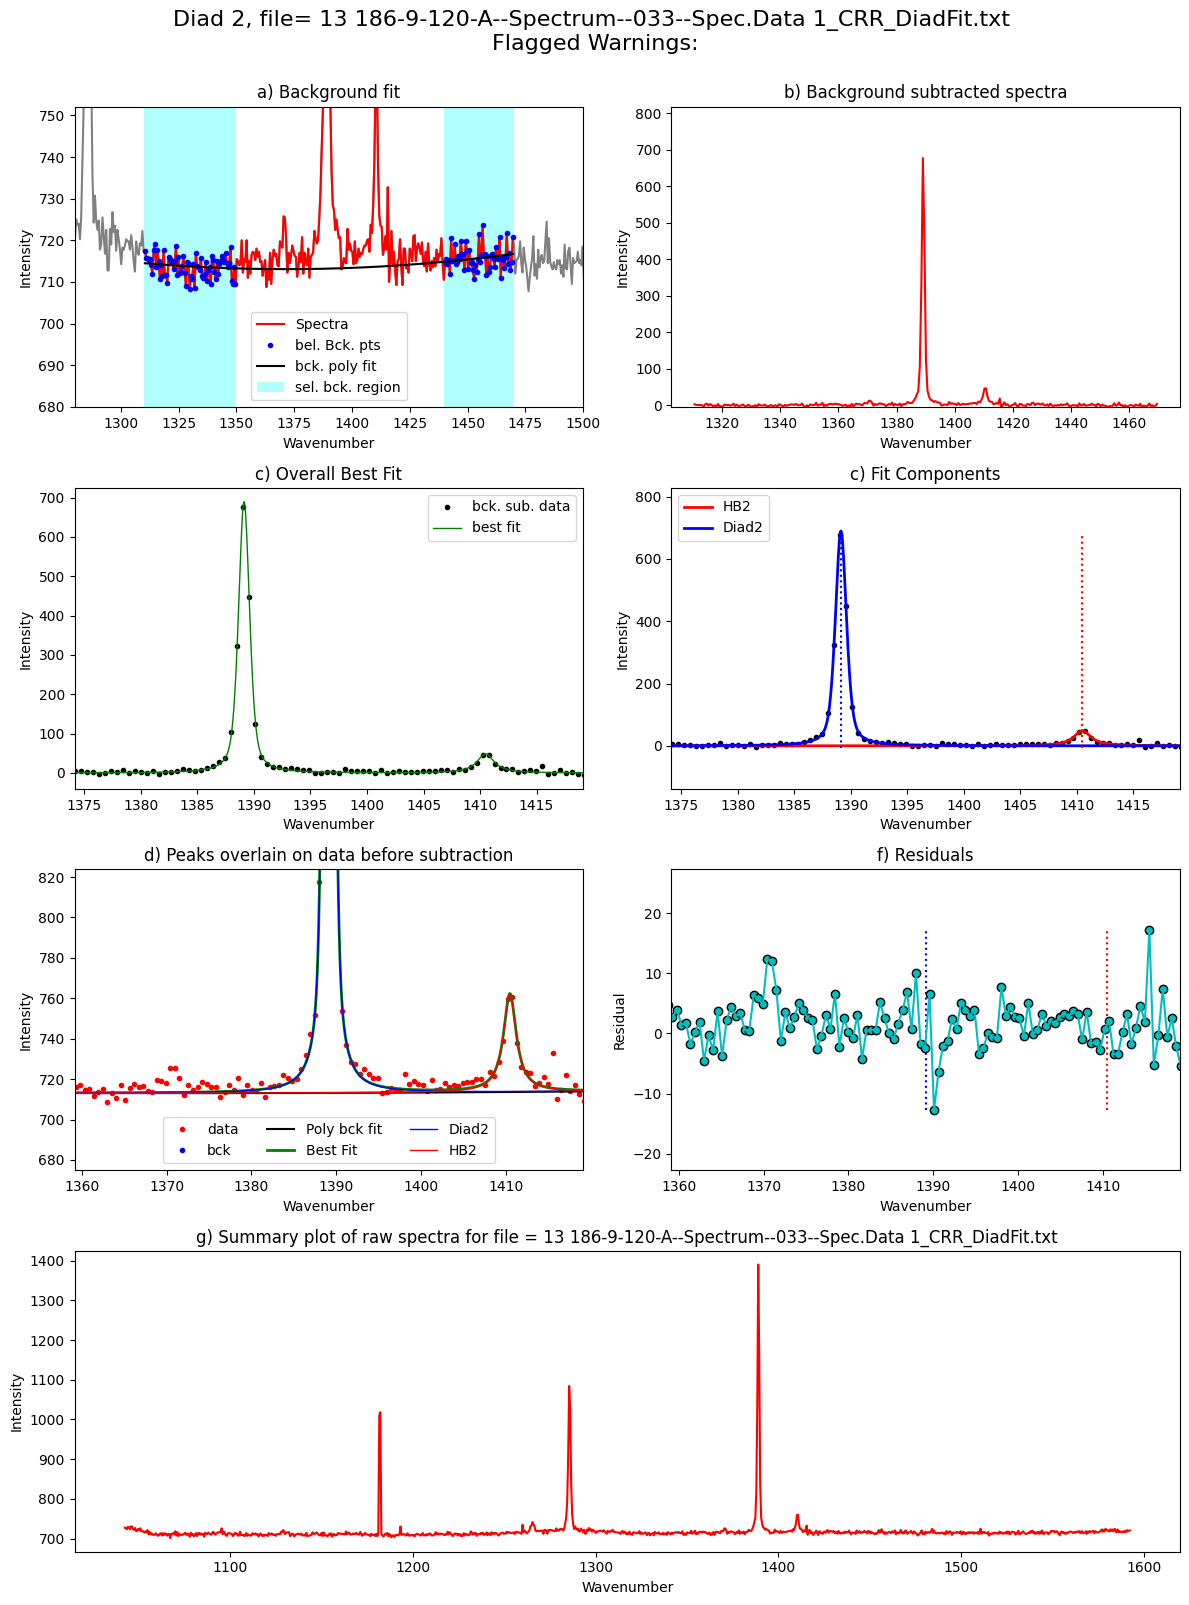

In [41]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/9 [00:00<?, ?it/s]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 13 186-9-120-A--Spectrum--033--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 11%|█         | 1/9 [00:01<00:10,  1.34s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 17 186-9-122-B--Spectrum--057--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 22%|██▏       | 2/9 [00:02<00:09,  1.35s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 24 187-8-101-B--Spectrum--083--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 33%|███▎      | 3/9 [00:04<00:08,  1.46s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 26 187-8-102-B--Spectrum--094--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 44%|████▍     | 4/9 [00:05<00:06,  1.40s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 27 187-8-102-C--Spectrum--096--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 56%|█████▌    | 5/9 [00:07<00:06,  1.55s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 28 187-8-102-D--Spectrum--098--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 67%|██████▋   | 6/9 [00:08<00:04,  1.47s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 29 187-8-102-E--Spectrum--100--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 78%|███████▊  | 7/9 [00:10<00:02,  1.45s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 32 187-8-103-A--Spectrum--111--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 89%|████████▉ | 8/9 [00:11<00:01,  1.42s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 35 187-8-103-MIC-bigbub--Spectrum--117--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


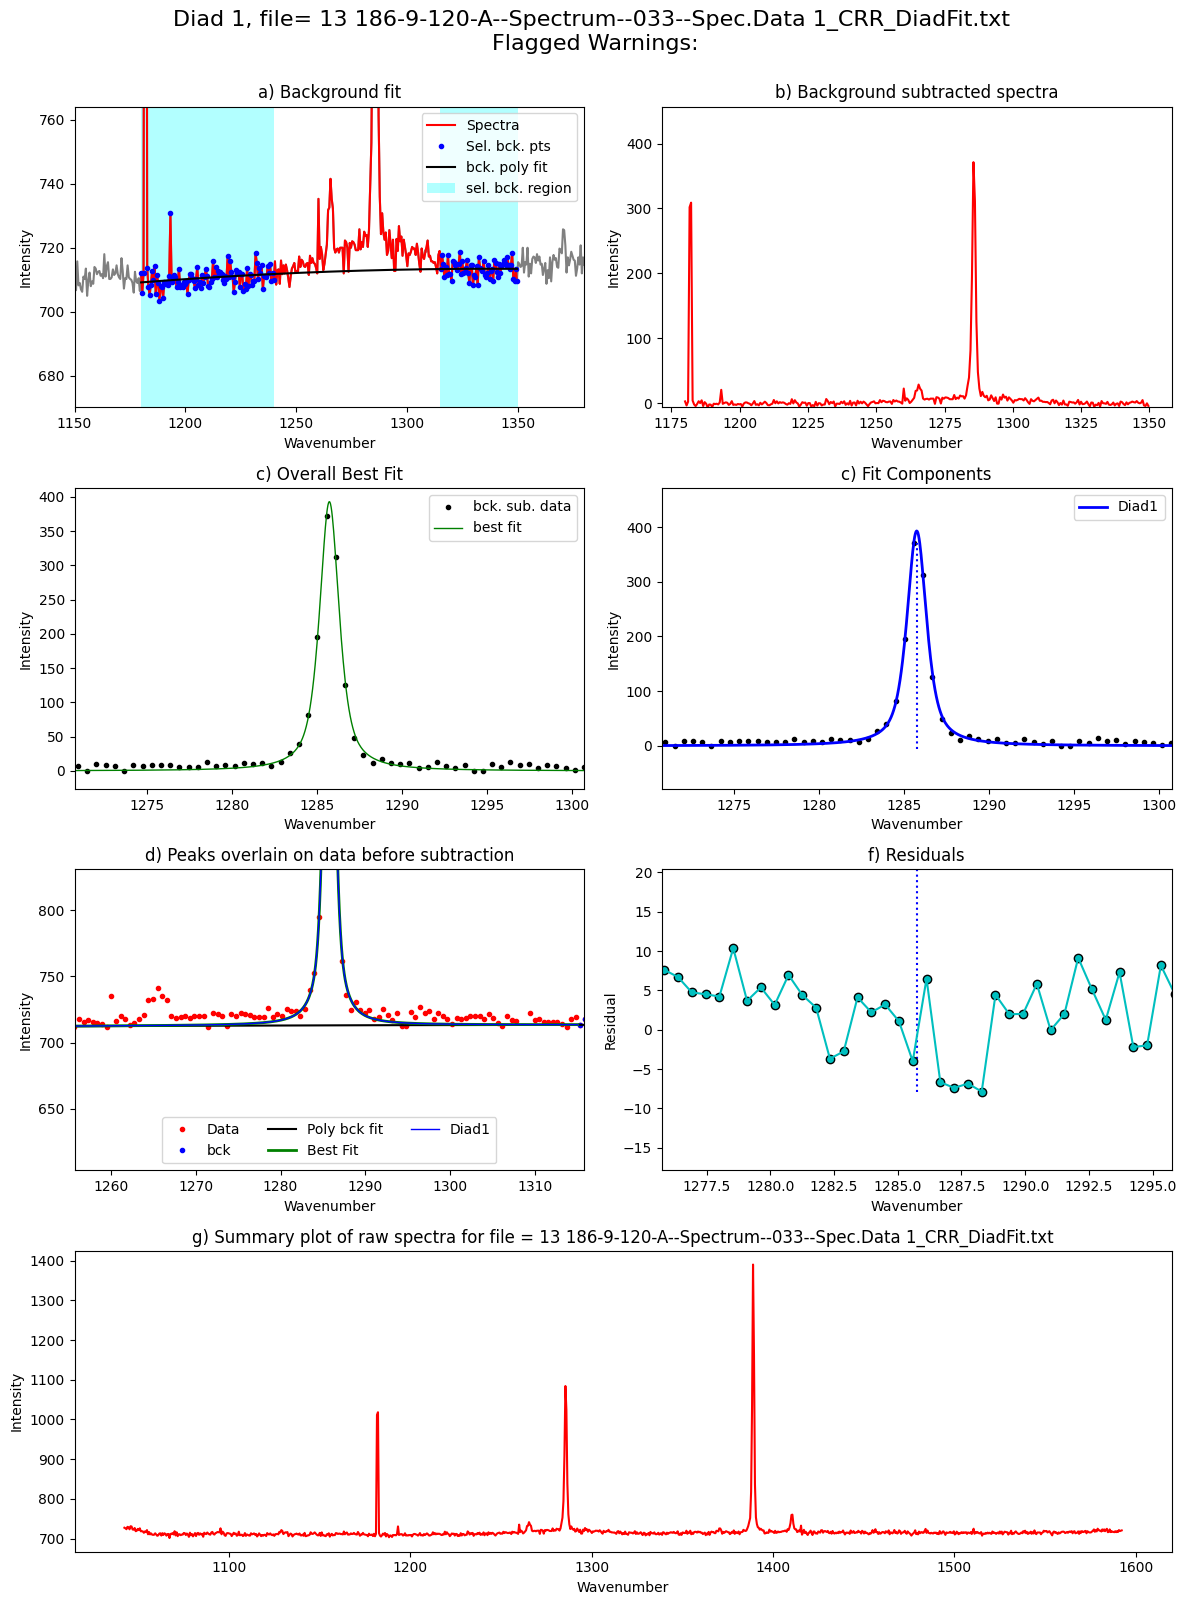

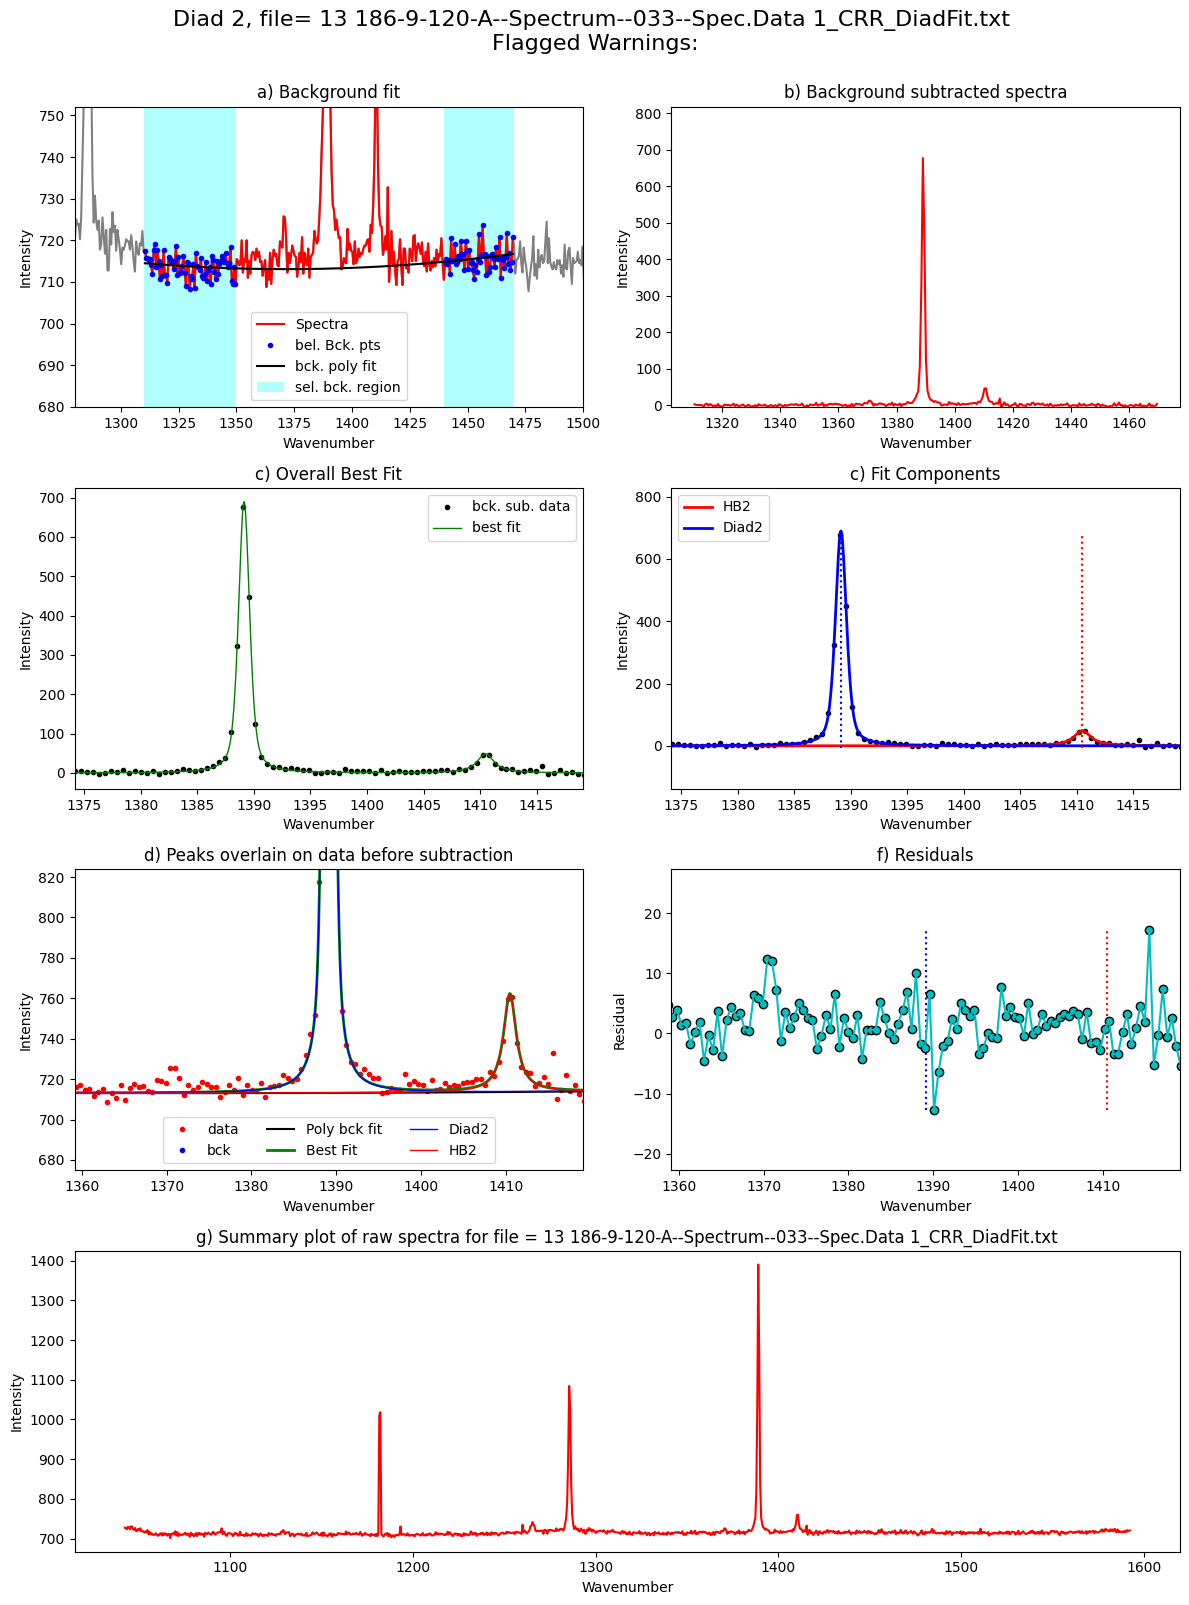

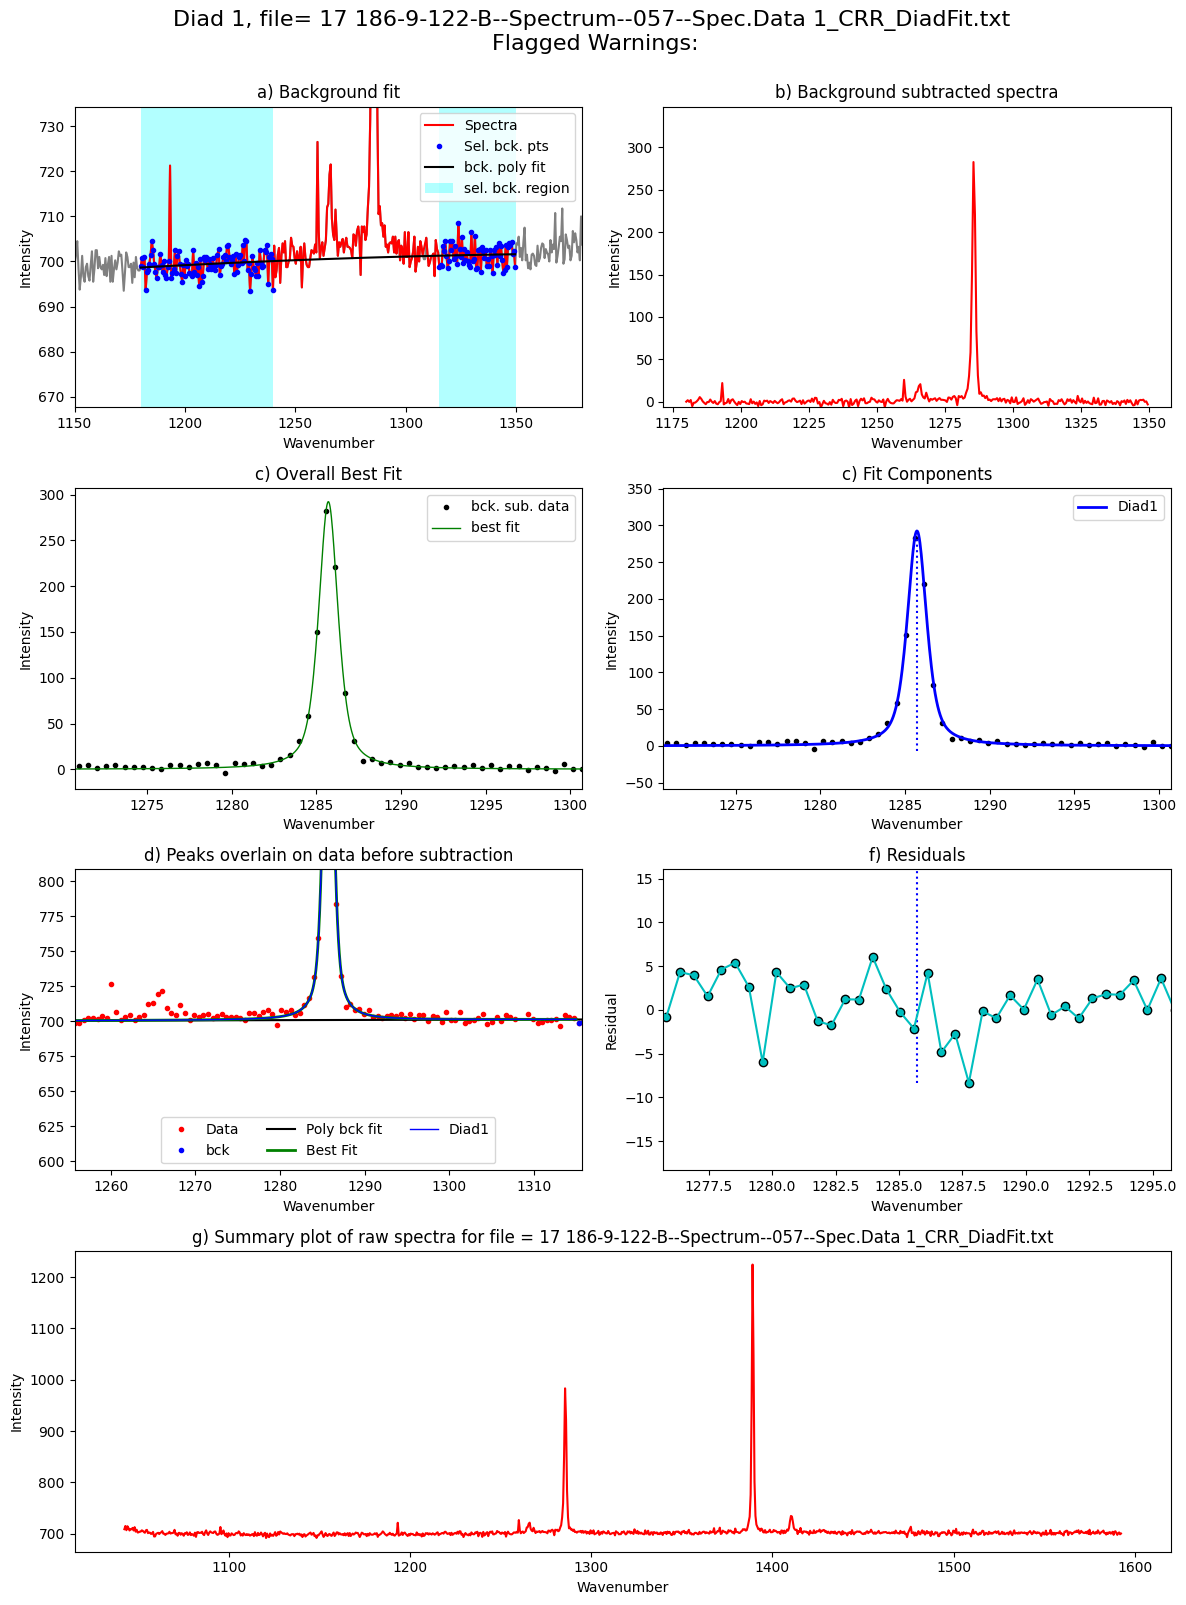

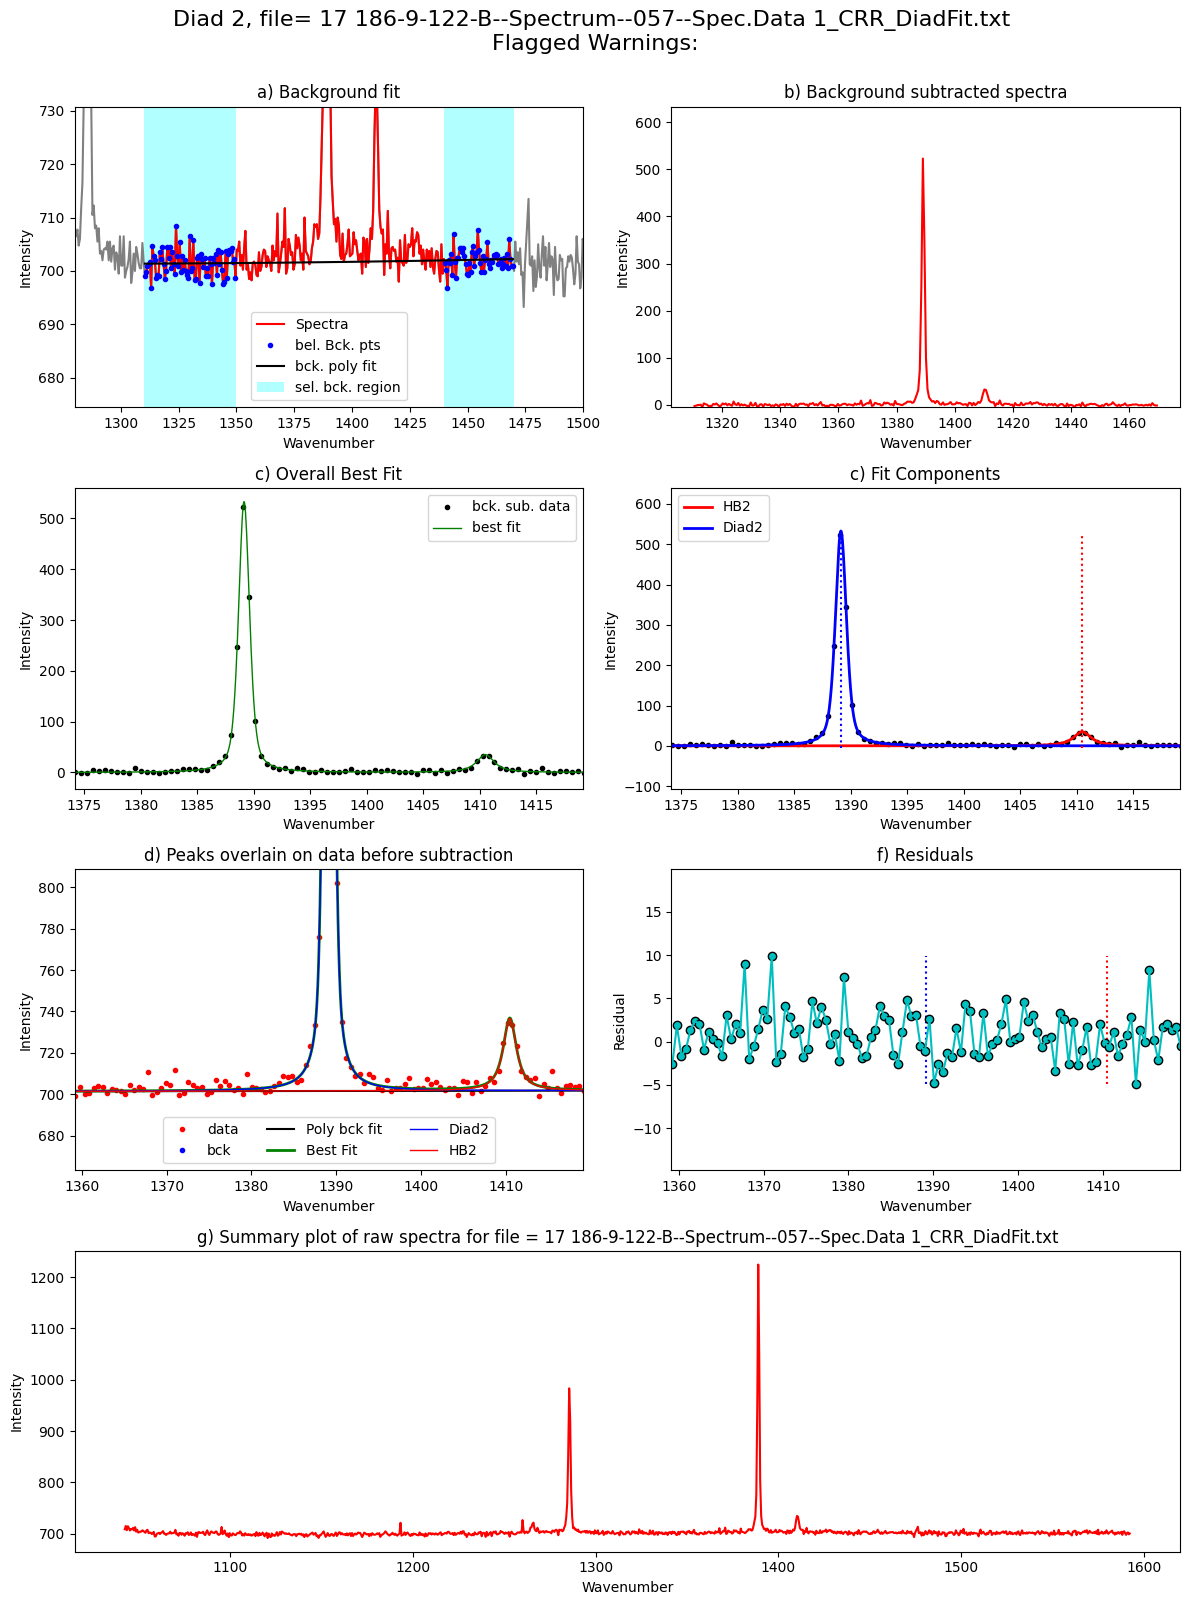

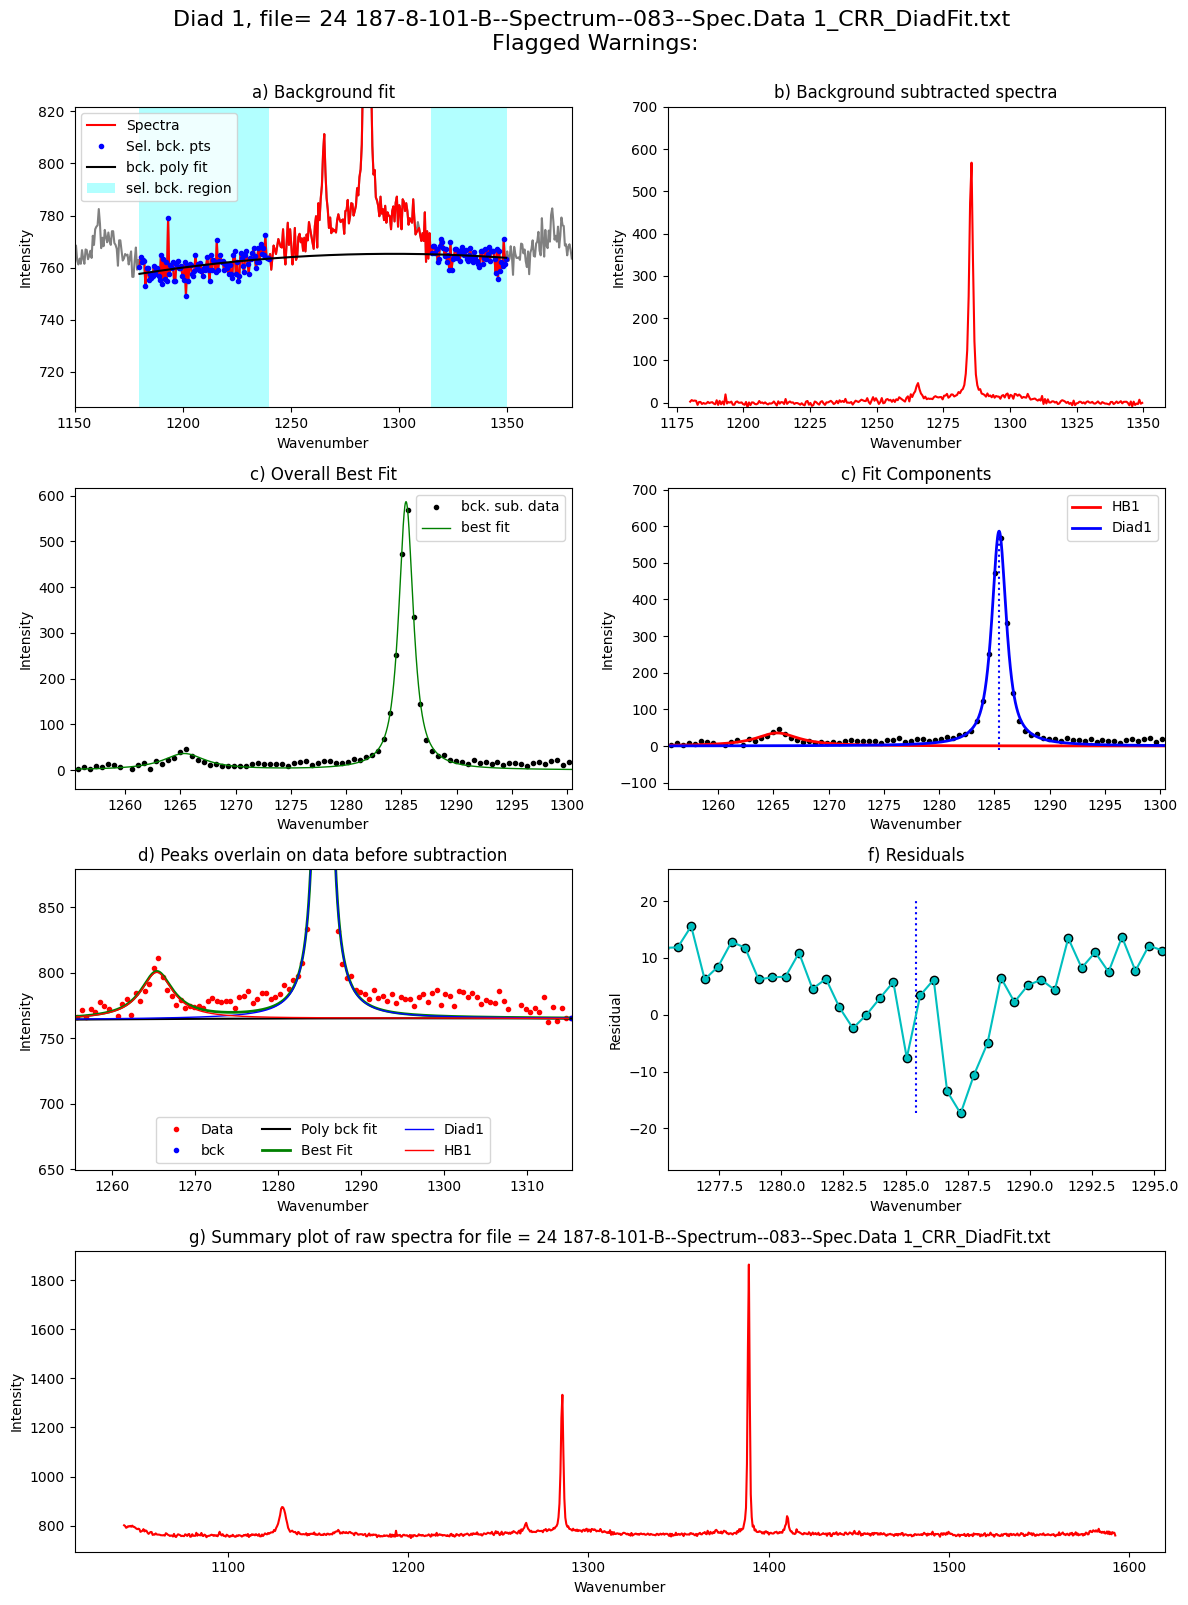

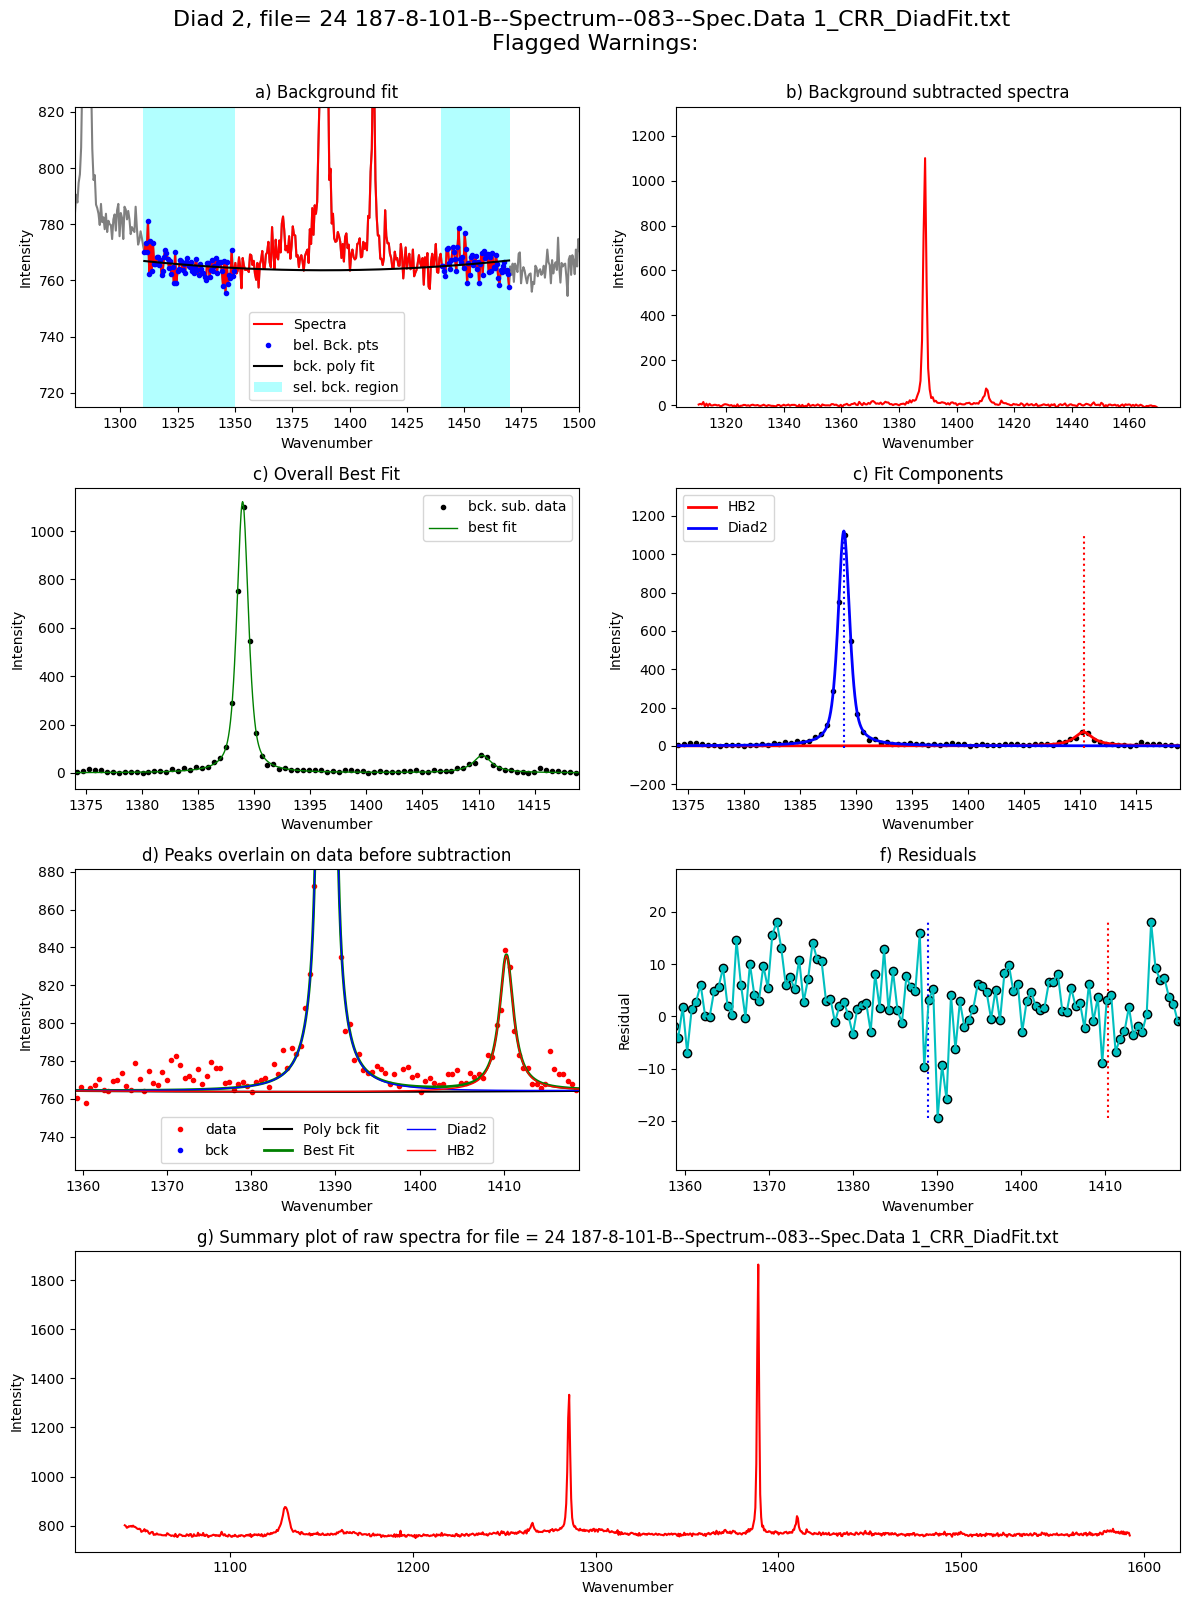

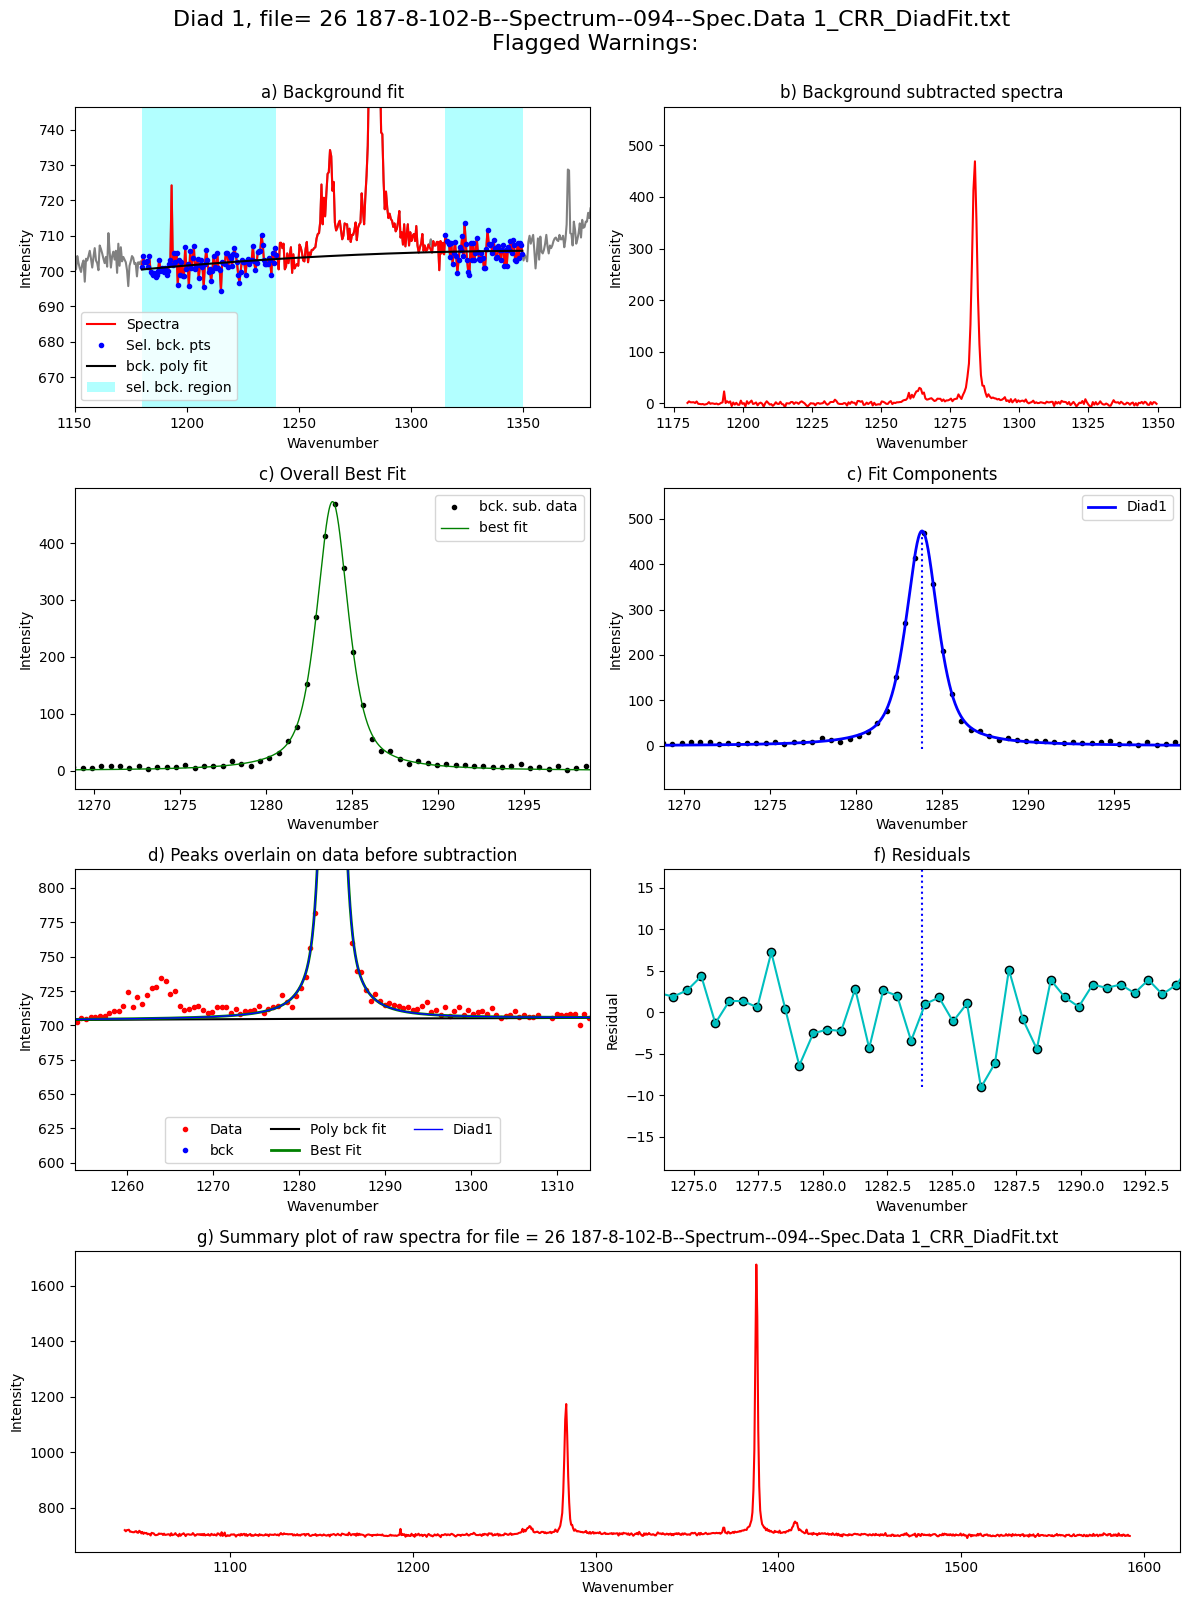

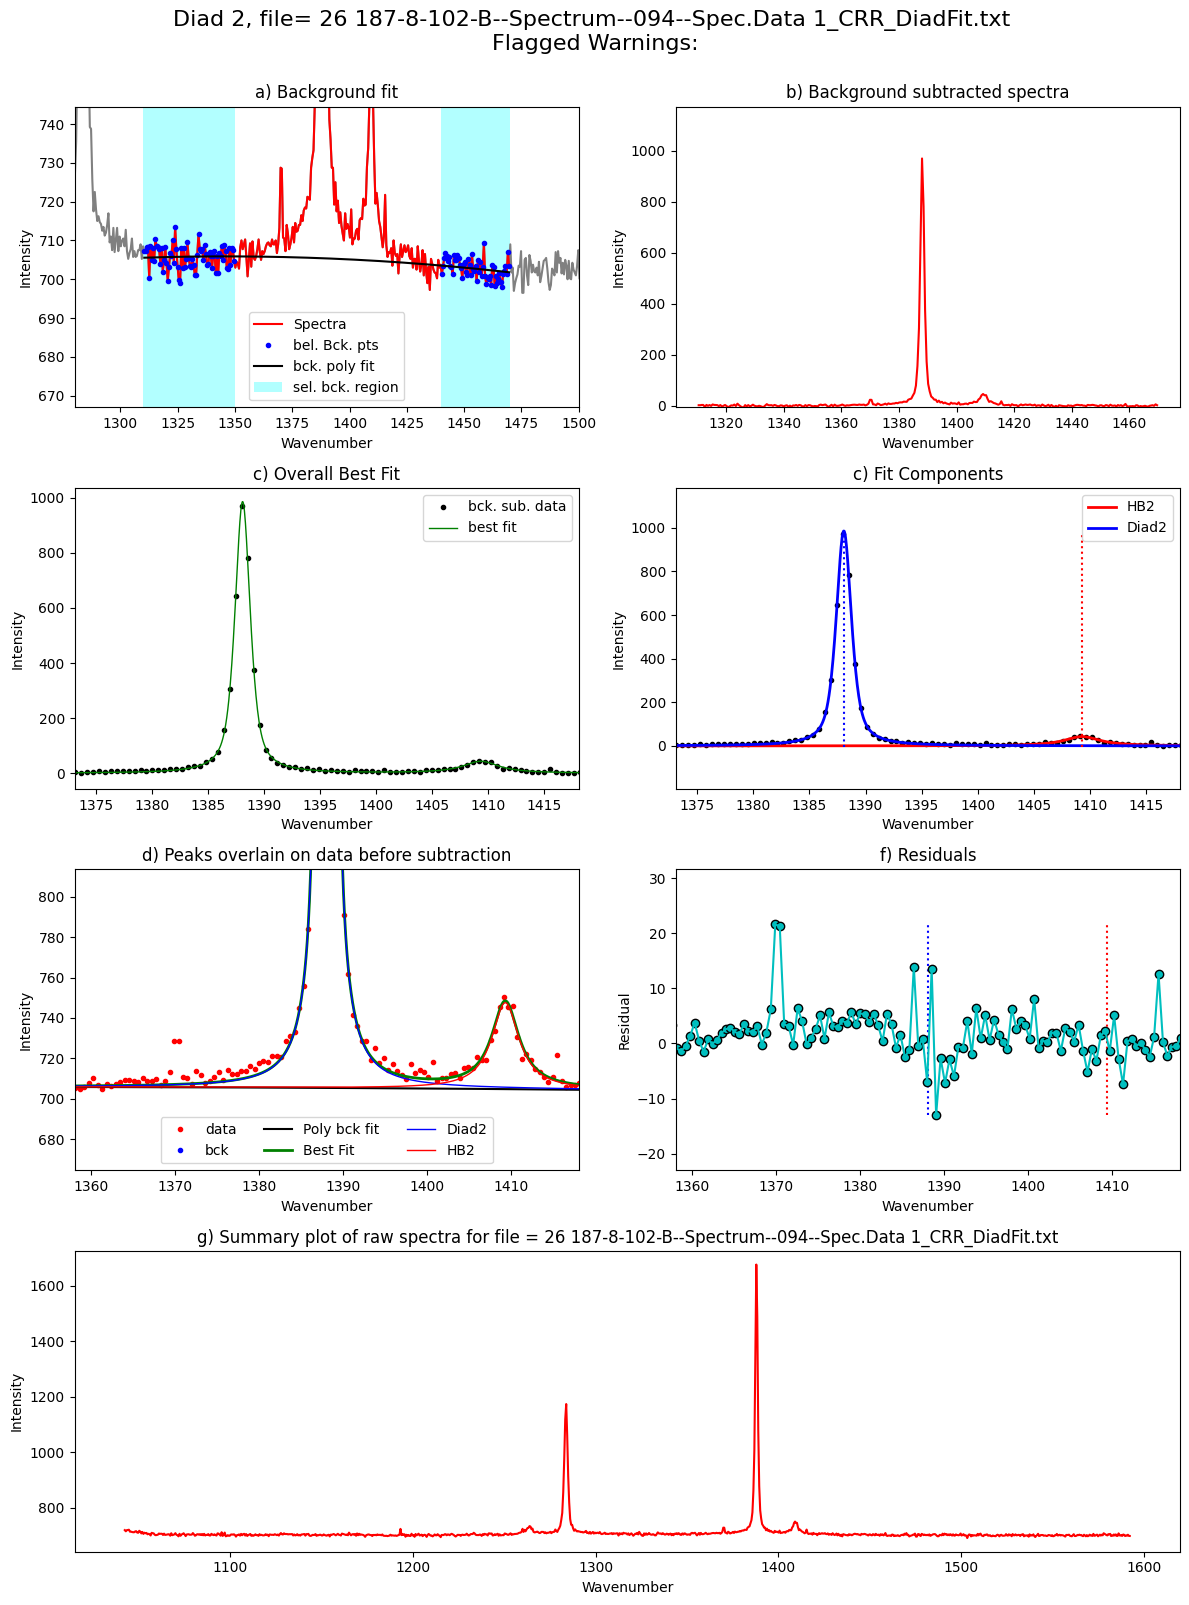

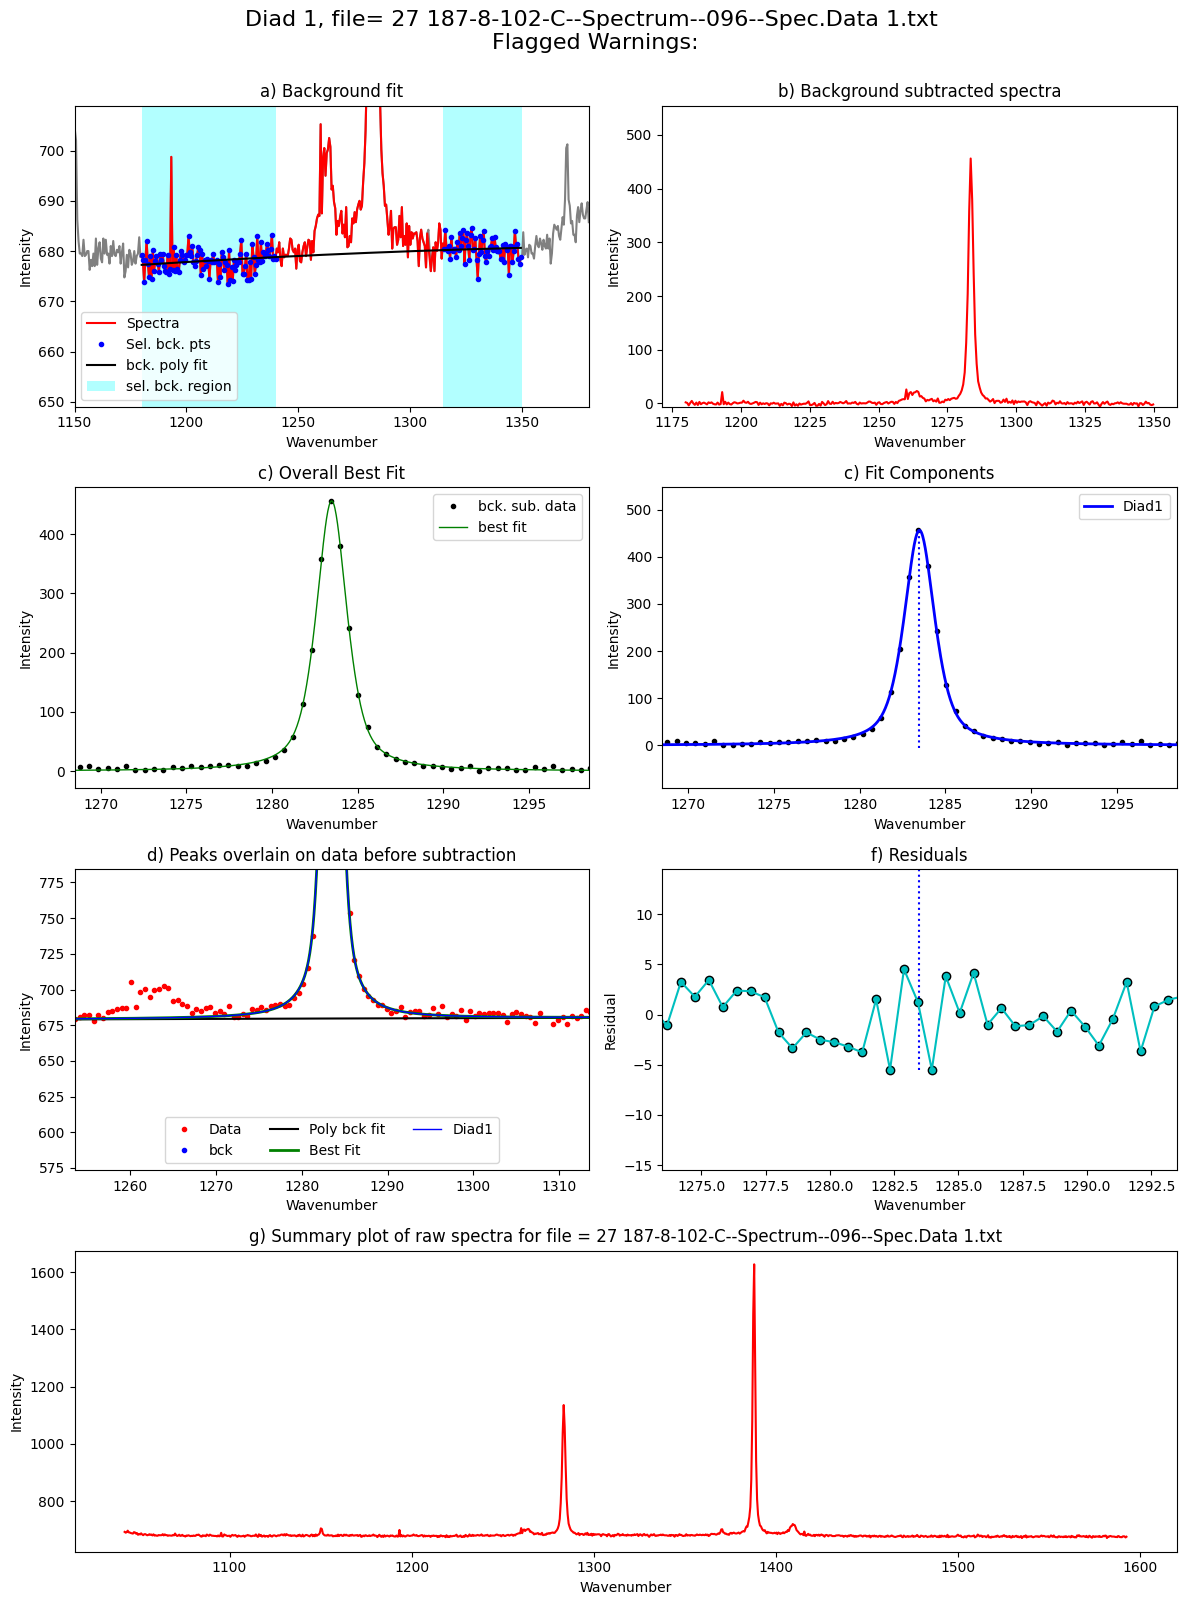

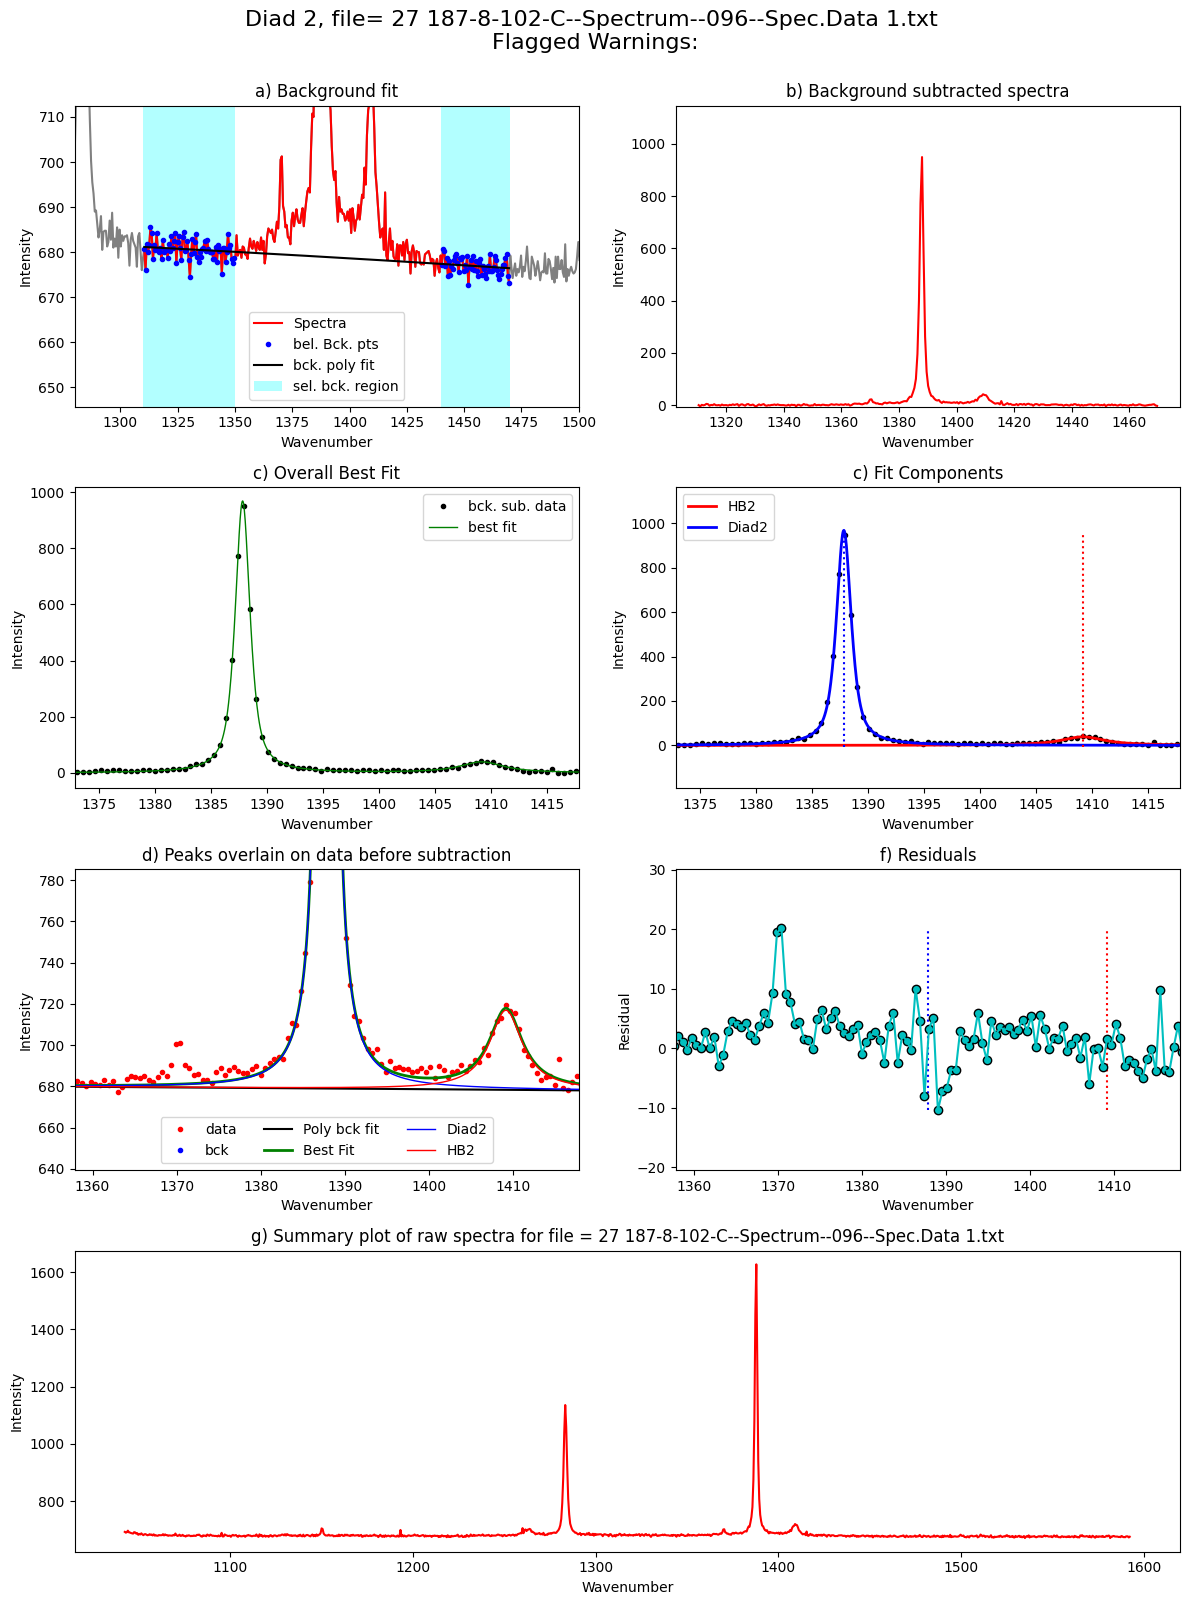

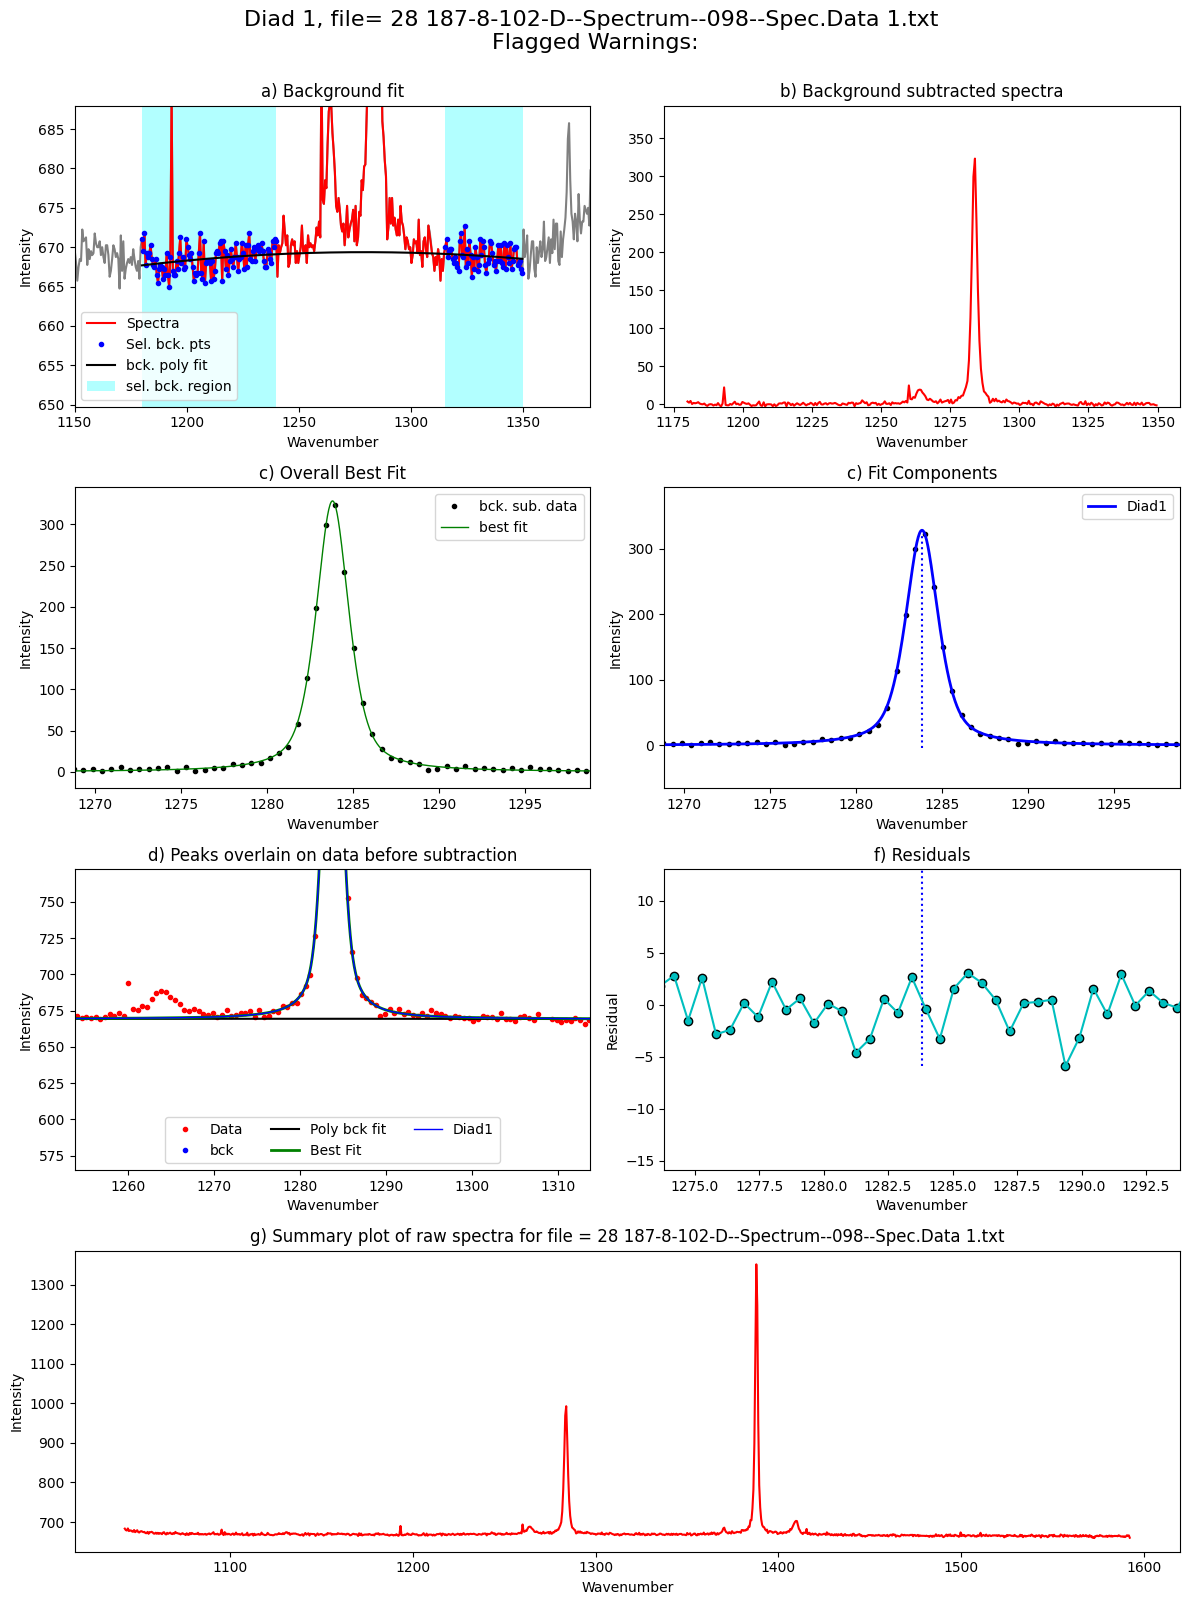

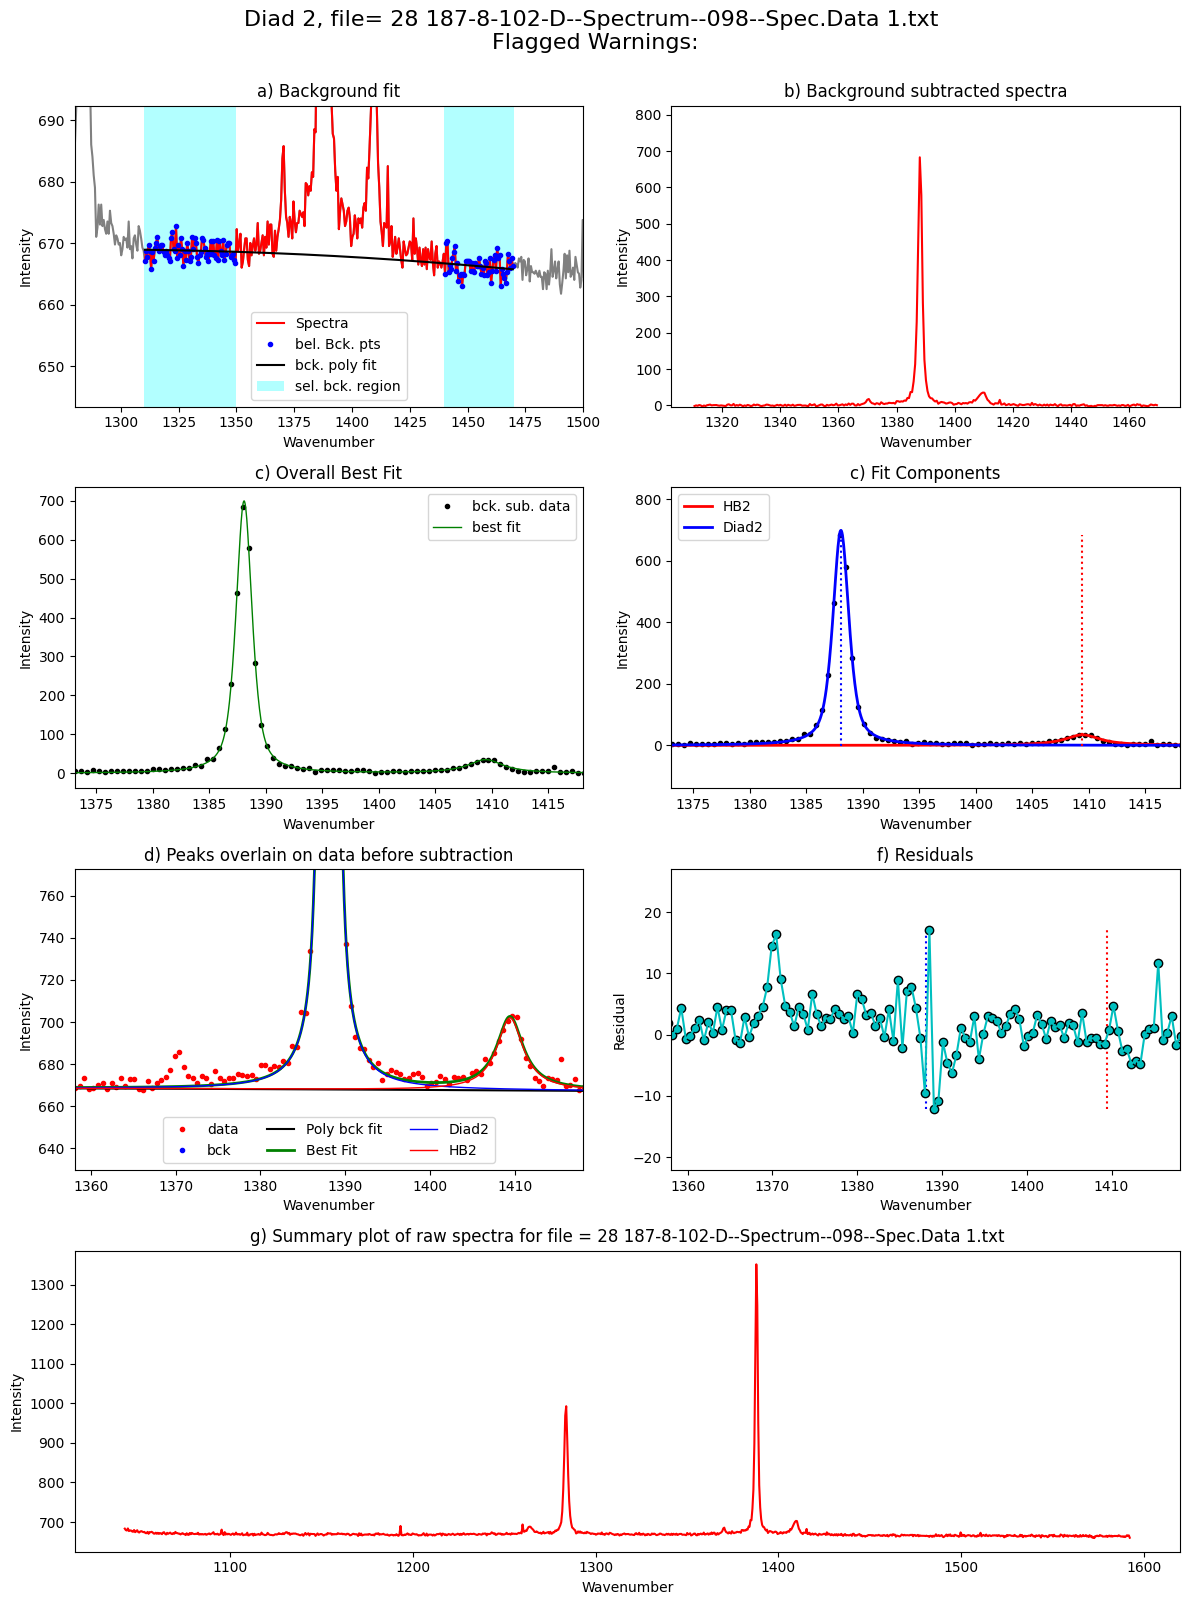

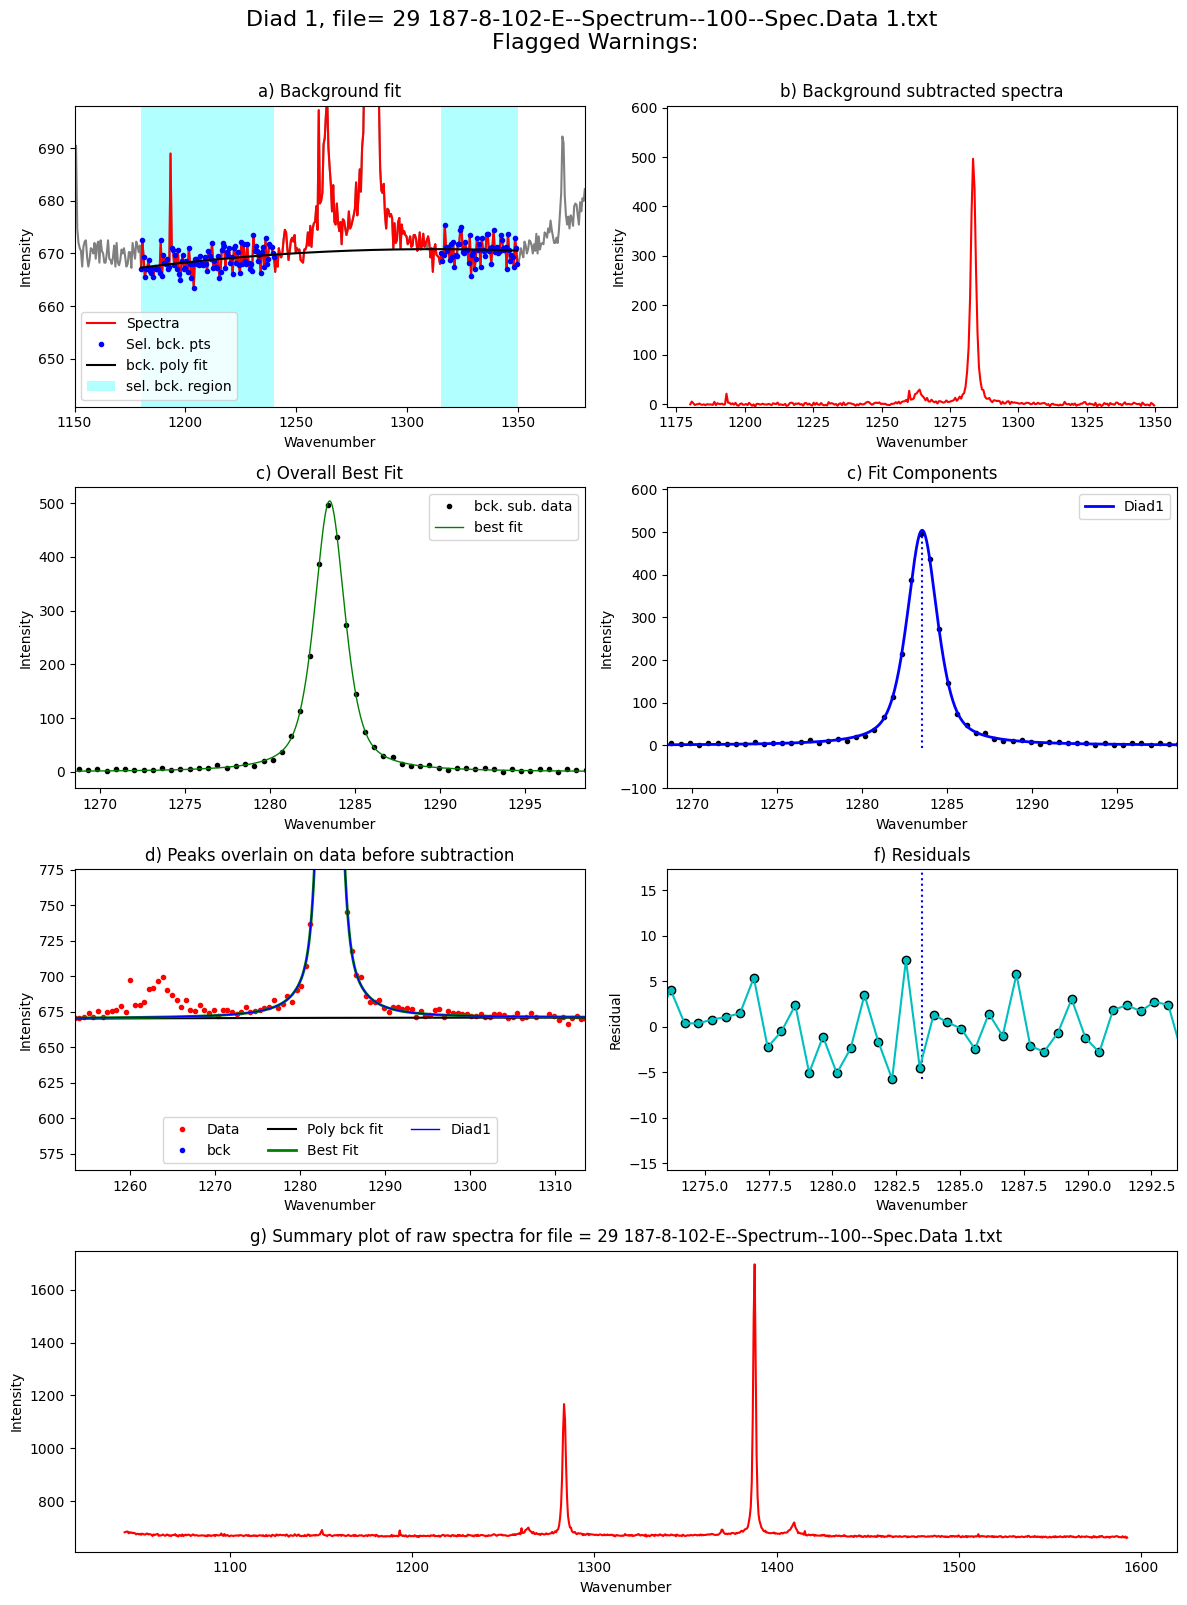

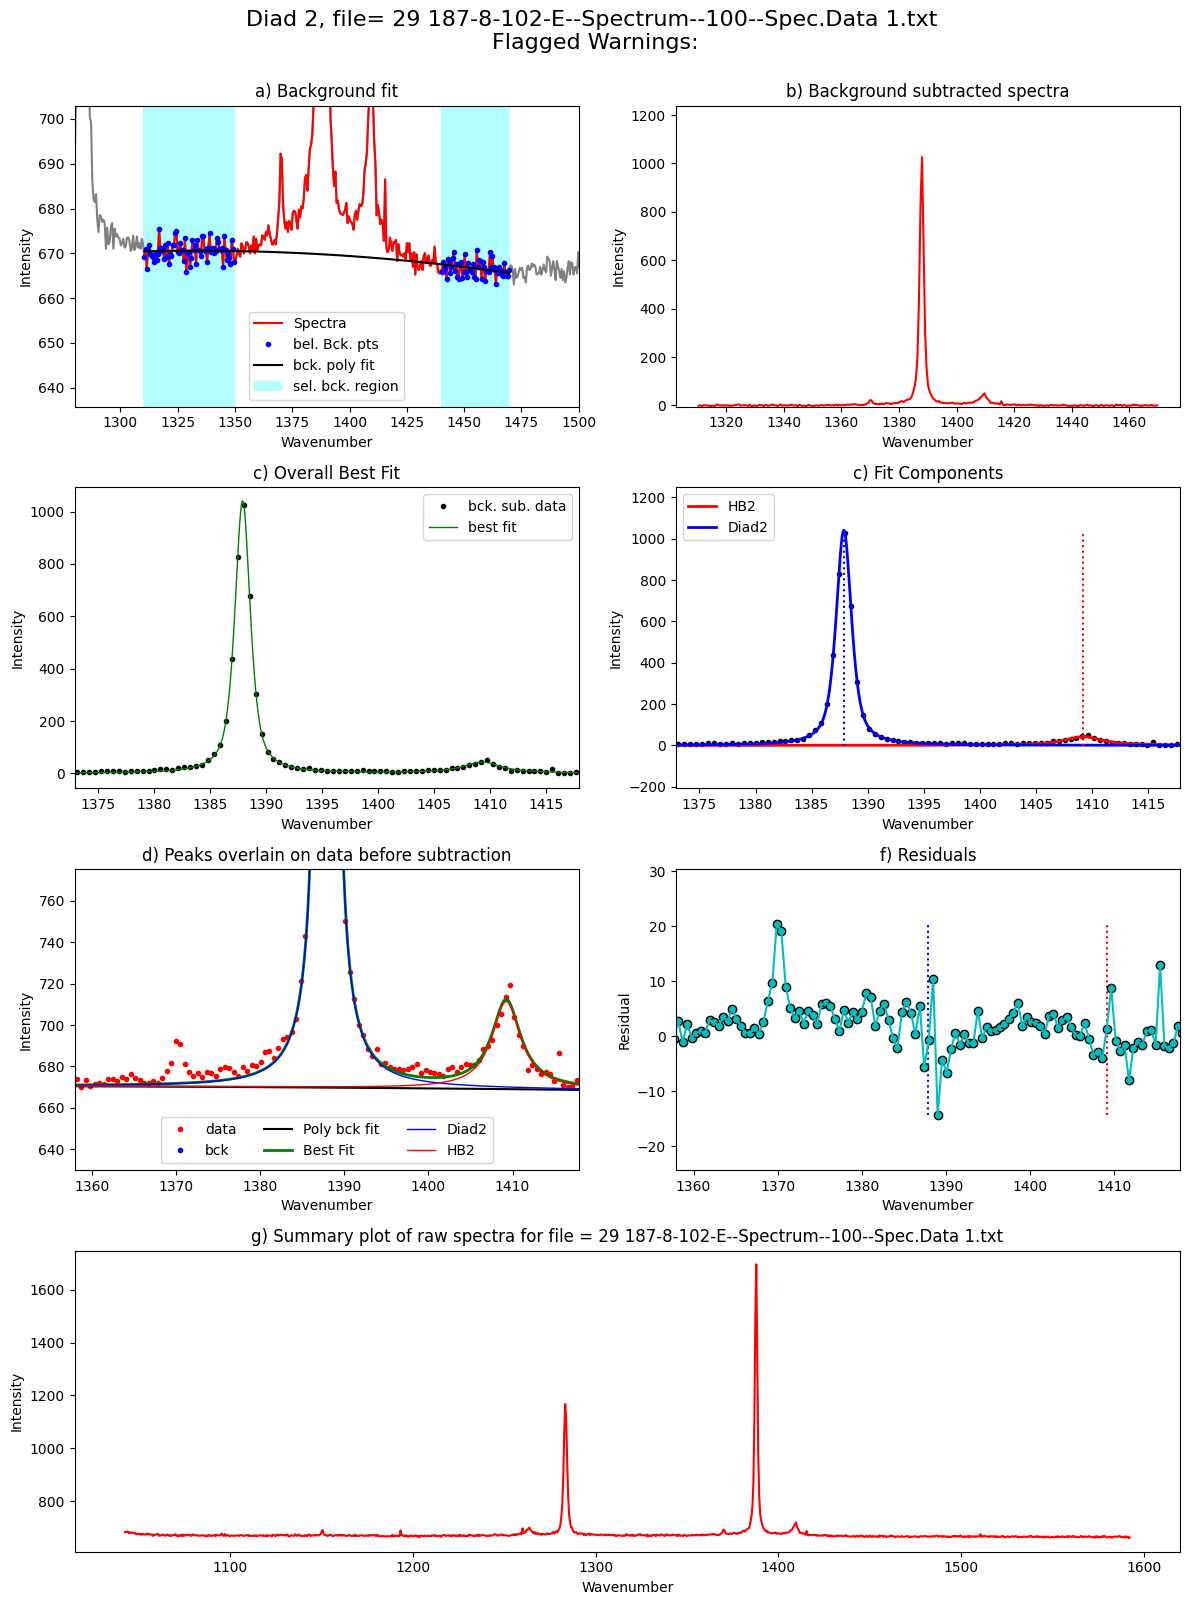

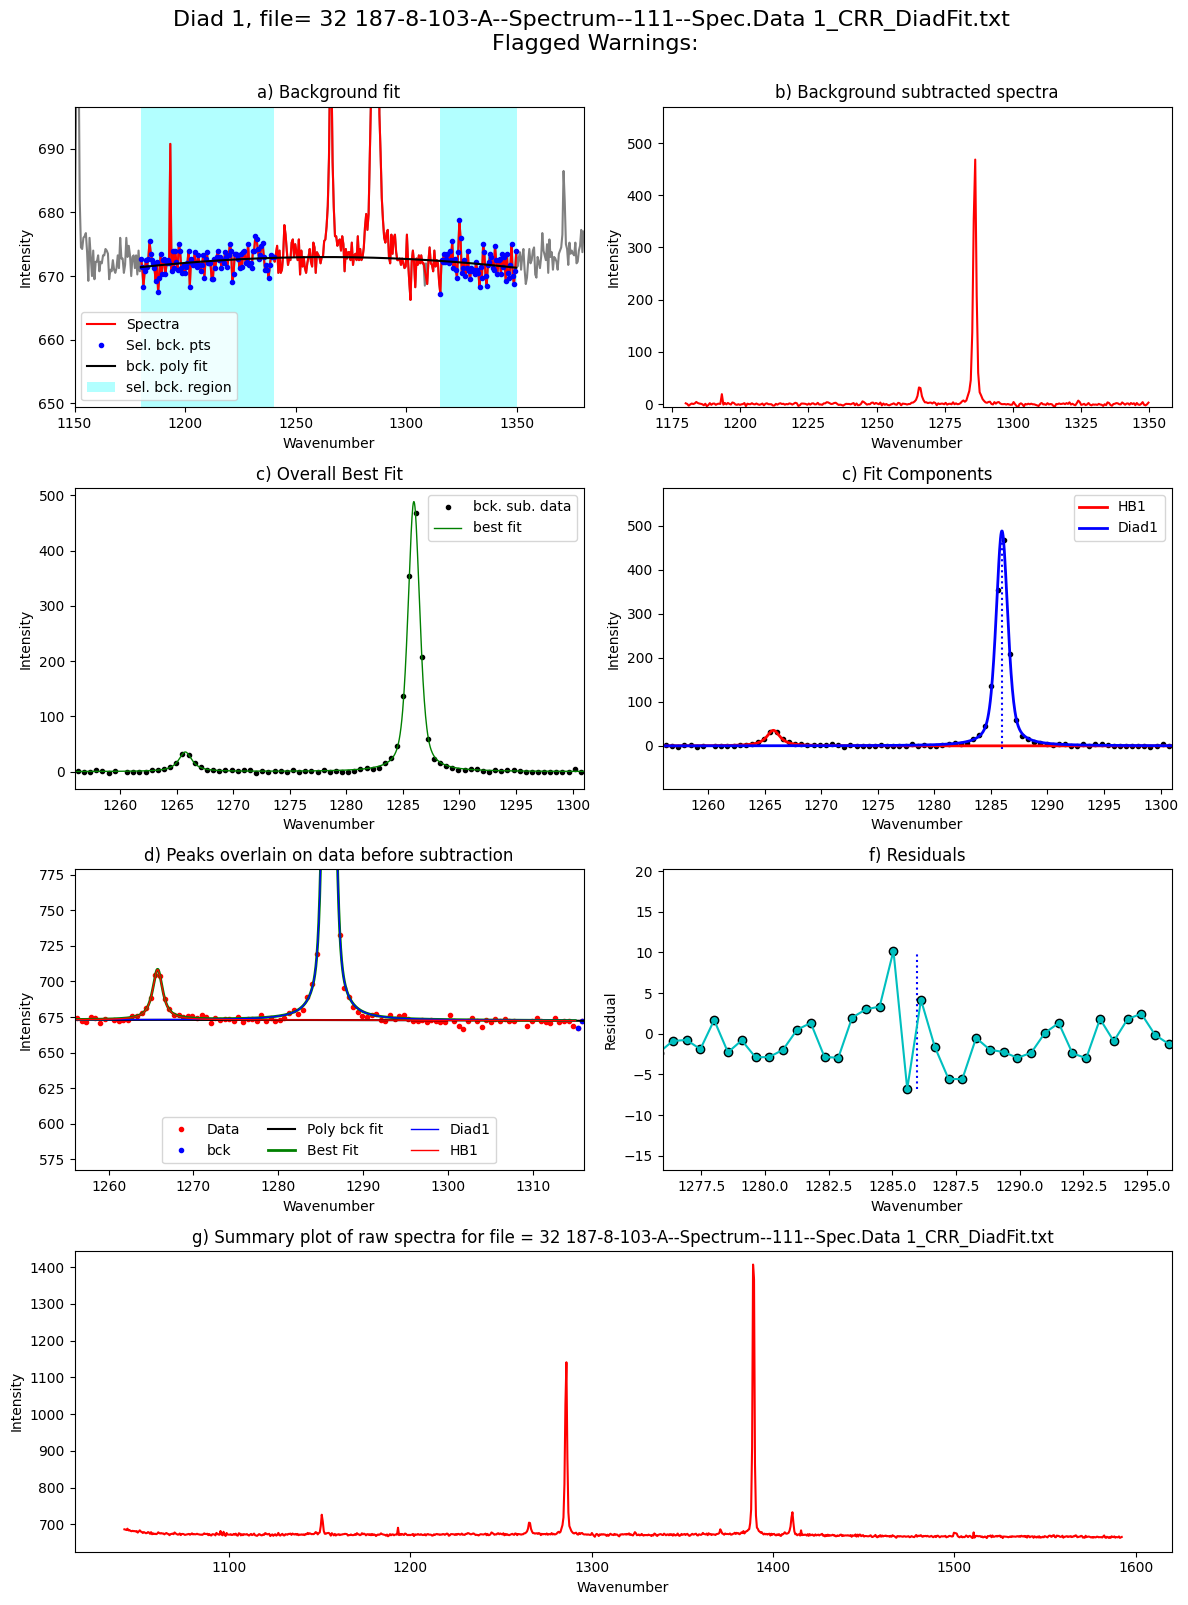

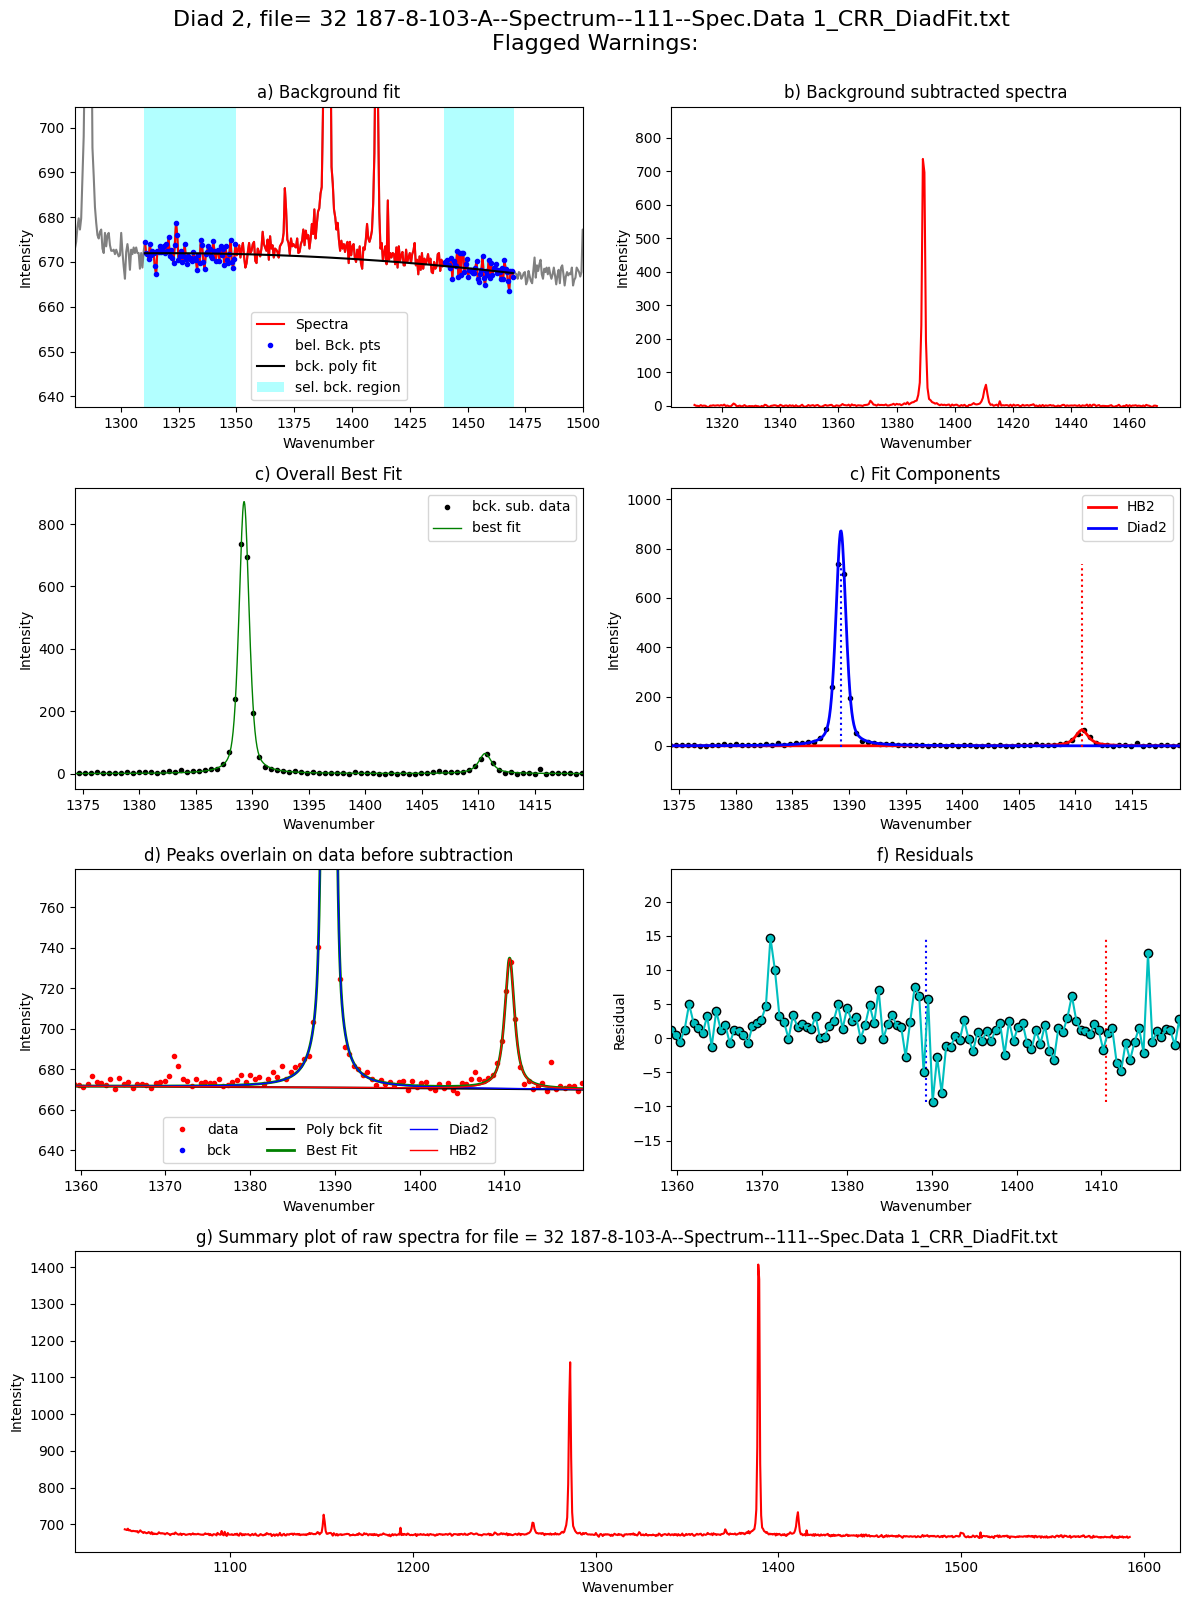

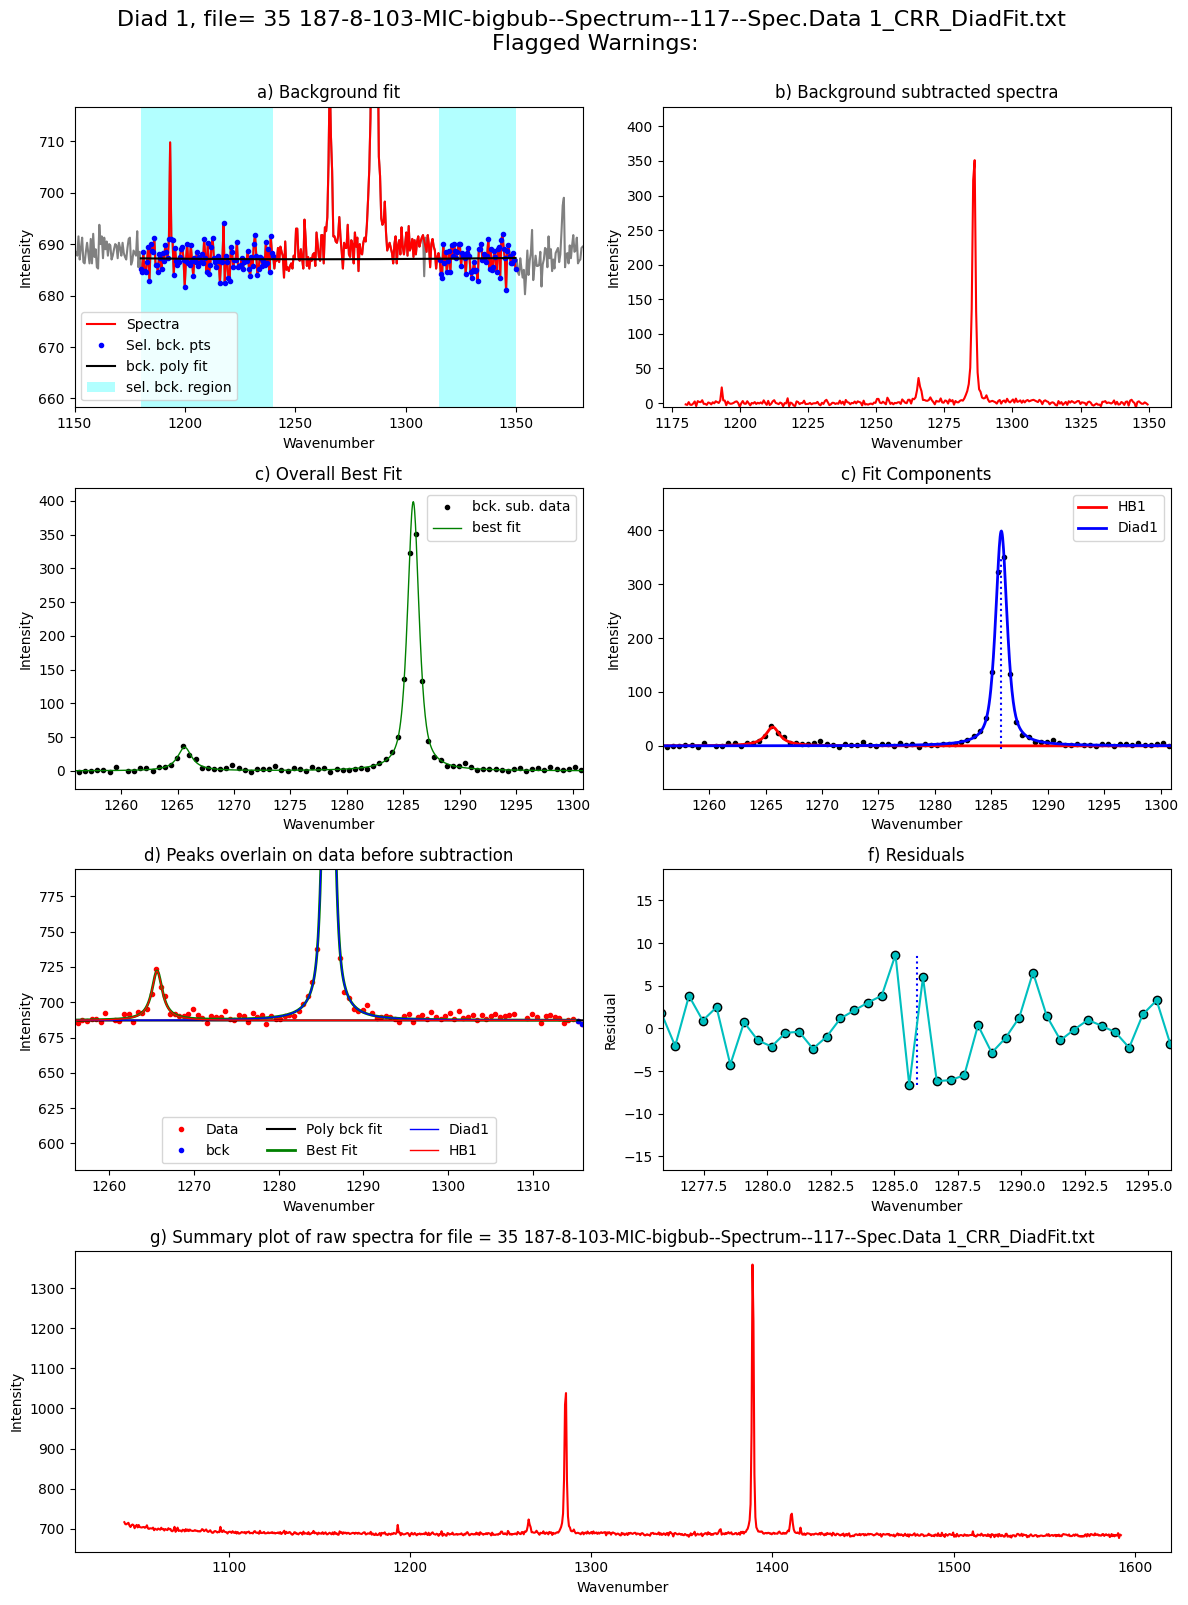

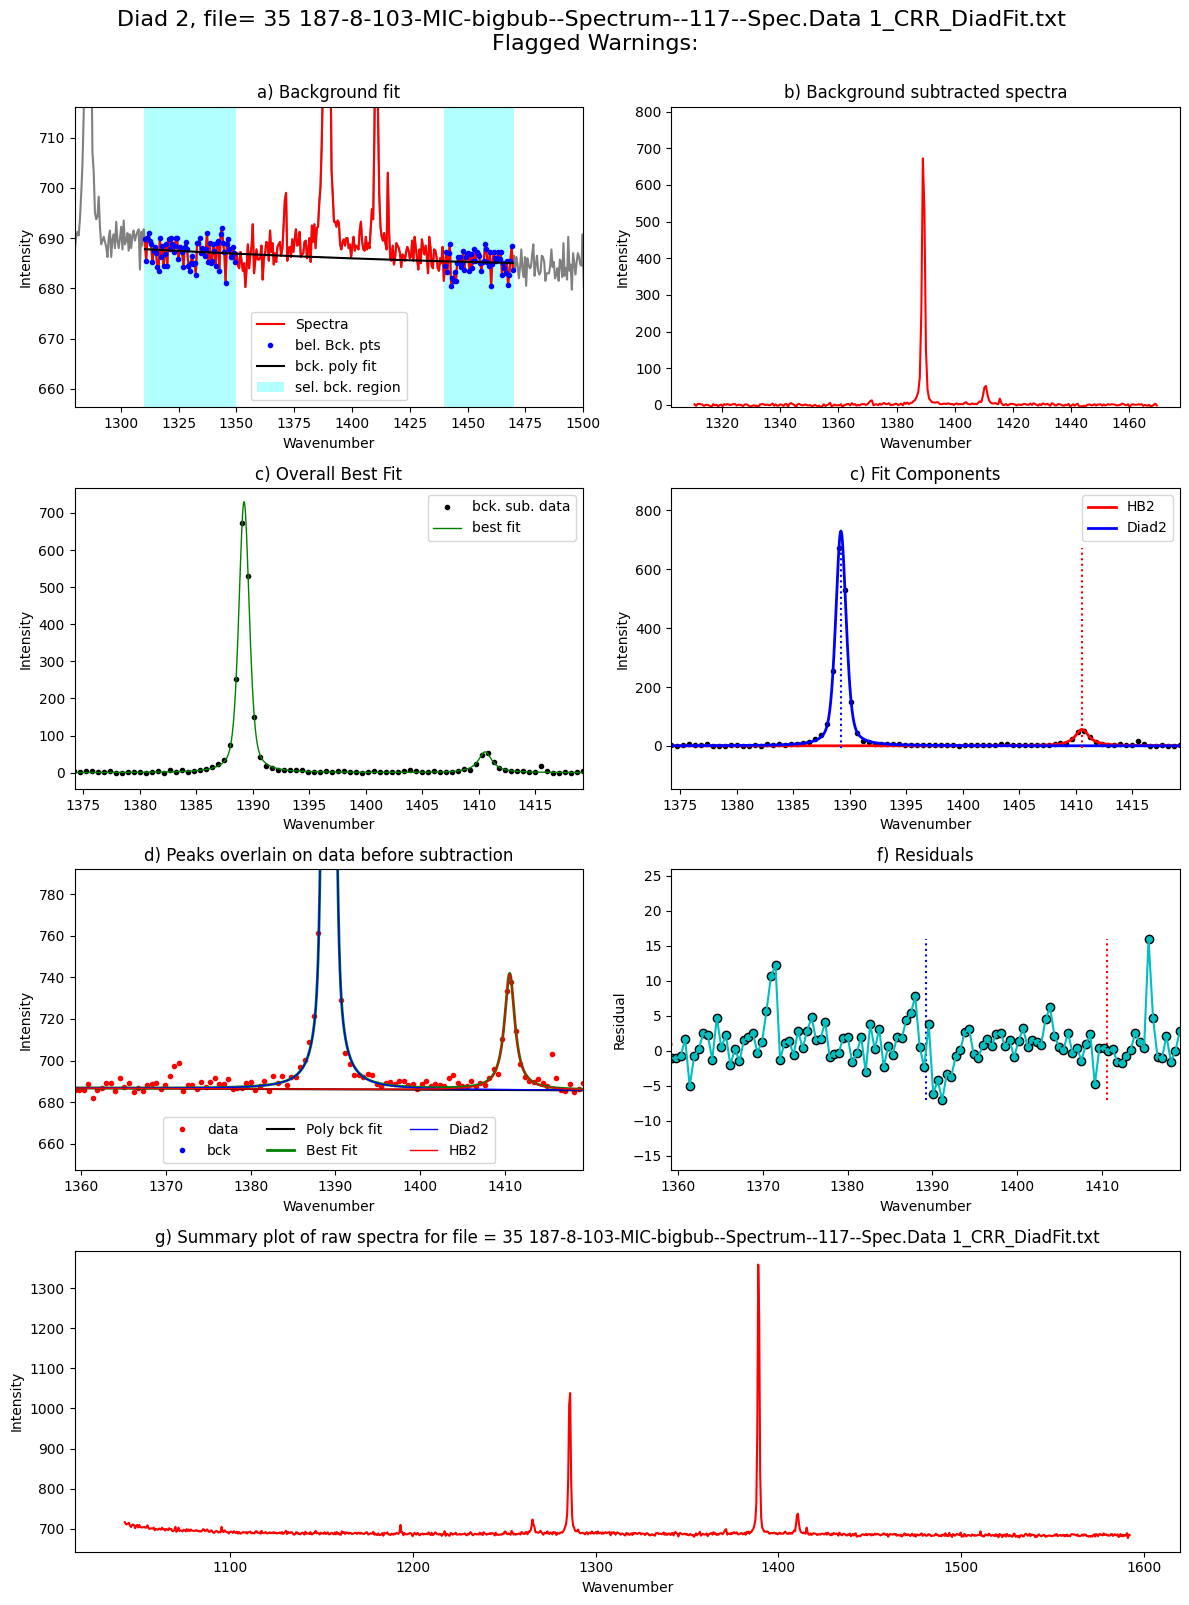

In [42]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [43]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [44]:
combo

filename   Splitting   Split_σ  \
0  186-9-120-A--Spectrum--033--Spec.Data 1_CRR_Di...  103.378748  0.042779   
1  186-9-122-B--Spectrum--057--Spec.Data 1_CRR_Di...  103.419046  0.009005   
2  187-8-101-B--Spectrum--083--Spec.Data 1_CRR_Di...  103.521910  0.008507   
3  187-8-102-B--Spectrum--094--Spec.Data 1_CRR_Di...  104.218867  0.009340   
4            187-8-102-C--Spectrum--096--Spec.Data 1  104.374682  0.008364   
5            187-8-102-D--Spectrum--098--Spec.Data 1  104.259981  0.009487   
6            187-8-102-E--Spectrum--100--Spec.Data 1  104.364560  0.007576   
7  187-8-103-A--Spectrum--111--Spec.Data 1_CRR_Di...  103.309381  0.003256   
8  187-8-103-MIC-bigbub--Spectrum--117--Spec.Data...  103.336902  0.004765   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1285.745262        0.042671             392.950543   
1          1285.709400        0.008538             292.447395   
2          1285.426195        0.007978             587.097538   
3          1283.844824        0.008943             472.874890   
4          1283.481262        0.008009             456.067880   
5          1283.815914        0.008924             328.354338   
6          1283.517521        0.007216             504.359504   
7          1285.976321        0.002862             488.830366   
8          1285.879653        0.004265             398.815277   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  ...  \
0       1285.745262        773.238422           0.691185        4.951513  ...   
1       1285.709400        545.771468           0.680190        2.970502  ...   
2       1285.426245       1383.796352           0.788716        7.321248  ...   
3       1283.844824       1429.472318           1.090927        4.341221  ...   
4       1283.481262       1343.690612           1.065152        3.666568  ...   
5       1283.815914       1008.734928           1.132506        2.581945  ...   
6       1283.517521       1459.945484           1.061066        3.494368  ...   
7       1285.976371        801.735328           0.617407        1.659220  ...   
8       1285.879703        677.346992           0.605289        2.263905  ...   

   Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  \
0      1.073350      1.010274                  0.101396              0.003518   
1      1.086076      1.012411                  0.117096              0.004652   
2      1.174208      1.165094                  0.274802              0.002687   
3      1.076923      1.044297                  0.167835              0.004614   
4      1.105705      1.054147                  0.225183              0.004671   
5      1.018072      1.024442                  0.040934              0.006898   
6      1.037157      1.040462                  0.078851              0.004208   
7      1.230994      1.214437                  0.285235              0.002526   
8      1.186630      1.201681                  0.225930              0.003035   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.111446      1.053419                   0.129566   
1      1.127660      1.086957                   0.147710   
2      1.173529      1.168421                   0.211454   
3      1.014523      1.016296                   0.023640   
4      1.125280      1.111975                   0.198419   
5      1.048583      1.084444                   0.082160   
6      1.104255      1.096823                   0.171548   
7      1.023121      1.008909                   0.024374   
8      1.164596      1.129630                   0.180113   

   Diad2_Remigi2021_BSF   Diad1_PDF_Model   Diad2_PDF_Model  
0              0.001686  PseudoVoigtModel  PseudoVoigtModel  
1              0.002171  PseudoVoigtModel  PseudoVoigtModel  
2              0.001086  PseudoVoigtModel  PseudoVoigtModel  
3              0.001651  PseudoVoigtModel  PseudoVoigtModel  
4              0.001635  PseudoVoigtModel  PseudoVoigtModel  
5              0.

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [45]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()